In [1]:
## HUMAN ACTION DETECTION

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [5]:
import statsmodels.api as sm

In [6]:
df = pd.read_csv("C:\\Users\\soumy\\Human Action Detection\\mhealth_raw_data.csv")
df

alx     aly      alz       glx      gly      glz     arx     ary  \
0        2.1849 -9.6967  0.63077  0.103900 -0.84053 -0.68762 -8.6499 -4.5781   
1        2.3876 -9.5080  0.68389  0.085343 -0.83865 -0.68369 -8.6275 -4.3198   
2        2.4086 -9.5674  0.68113  0.085343 -0.83865 -0.68369 -8.5055 -4.2772   
3        2.1814 -9.4301  0.55031  0.085343 -0.83865 -0.68369 -8.6279 -4.3163   
4        2.4173 -9.3889  0.71098  0.085343 -0.83865 -0.68369 -8.7008 -4.1459   
...         ...     ...      ...       ...      ...      ...     ...     ...   
1215740  1.7849 -9.8287  0.29725 -0.341370 -0.90056 -0.61493 -3.7198 -8.9071   
1215741  1.8687 -9.8766  0.46236 -0.341370 -0.90056 -0.61493 -3.7160 -8.7455   
1215742  1.6928 -9.9290  0.16631 -0.341370 -0.90056 -0.61493 -3.8824 -9.1155   
1215743  1.5279 -9.6306  0.30458 -0.341370 -0.90056 -0.61493 -3.5564 -9.1441   
1215744  1.6614 -9.8398  0.18088 -0.332100 -0.90432 -0.61886 -3.9035 -8.9324   

              arz       grx      gry       grz  Activity    subject  
0        0.187760 -0.449020 -1.01030  0.034483         0   subject1  
1        0.023595 -0.449020 -1.01030  0.034483         0   subject1  
2        0.275720 -0.449020 -1.01030  0.034483         0   subject1  
3        0.367520 -0.456860 -1.00820  0.025862         0   subject1  
4        0.407290 -0.456860 -1.00820  0.025862         0   subject1  
...           ...       ...      ...       ...       ...        ...  
1215740  0.294230  0.041176 -0.99384 -0.480600         0  subject10  
1215741  0.448140  0.041176 -0.99384 -0.480600         0  subject10  
1215742  0.450480  0.041176 -0.99384 -0.480600         0  subject10  
1215743  0.594880  0.041176 -0.99384 -0.480600         0  subject10  
1215744  0.761710  0.035294 -1.02050 -0.471980         0  subject10  

[1215745 rows x 14 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


In [8]:
df.describe()

alx           aly           alz           glx           gly  \
count  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06   
mean   1.494200e+00 -9.692878e+00 -9.548056e-01 -1.598951e-03 -6.166318e-01   
std    3.826485e+00  4.171303e+00  5.461803e+00  4.912172e-01  3.546406e-01   
min   -2.214600e+01 -1.961900e+01 -1.937300e+01 -2.146600e+00 -7.789900e+00   
25%    1.413100e-01 -1.020100e+01 -2.649400e+00 -4.359900e-01 -8.180100e-01   
50%    1.308900e+00 -9.670300e+00 -1.645600e-02 -1.484200e-02 -7.073200e-01   
75%    2.575800e+00 -9.042200e+00  1.301300e+00  4.489800e-01 -5.403400e-01   
max    2.005400e+01  2.116100e+01  2.501500e+01  6.048400e+01  2.011300e+00   

                glz           arx           ary           arz           grx  \
count  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06  1.215745e+06   
mean  -1.587811e-01 -3.713413e+00 -5.805526e+00  2.393880e+00 -2.761061e-01   
std    5.467979e-01  4.763586e+00  5.757639e+00  3.876503e+00  5.276888e-01   
min   -2.626700e+00 -2.236100e+01 -1.897200e+01 -1.823900e+01 -8.339200e+00   
25%   -5.933200e-01 -6.076000e+00 -9.404200e+00  1.296500e-01 -7.058800e-01   
50%   -1.905700e-01 -2.977600e+00 -7.461500e+00  1.928100e+00 -3.549000e-01   
75%    3.222000e-01 -1.193700e+00 -2.533900e+00  4.914700e+00  9.607800e-02   
max    2.770100e+00  1.986400e+01  2.219100e+01  2.574100e+01  3.319600e+00   

                gry           grz      Activity  
count  1.215745e+06  1.215745e+06  1.215745e+06  
mean  -4.664340e-01  2.666335e-01  1.741465e+00  
std    5.555510e-01  5.643804e-01  3.283679e+00  
min   -3.570800e+00 -2.689700e+00  0.000000e+00  
25%   -8.973300e-01 -2.370700e-01  0.000000e+00  
50%   -6.345000e-01  3.017200e-01  0.000000e+00  
75%   -1.067800e-01  7.780200e-01  2.000000e+00  
max    1.556500e+00  2.750000e+00  1.200000e+01

In [9]:
df.isnull().sum()

alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Activity'>

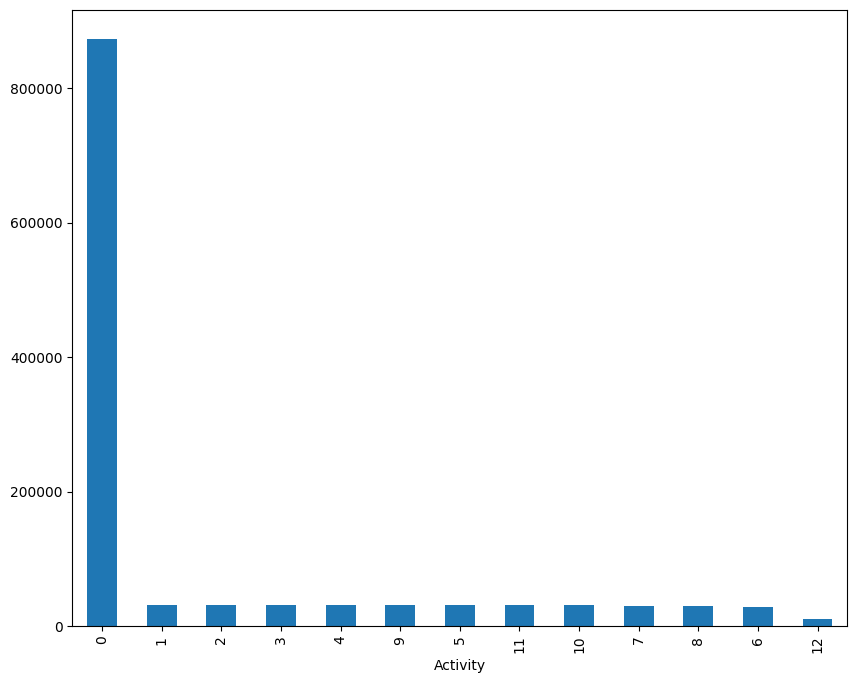

In [11]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [12]:
data_activity_0 = df[df["Activity"] == 0]
data_activity_else = df[df["Activity"] != 0]

In [13]:
data_activity_0 = data_activity_0.sample(n=40000, random_state=42)

In [14]:
df = pd.concat([data_activity_0, data_activity_else])

<Axes: xlabel='Activity'>

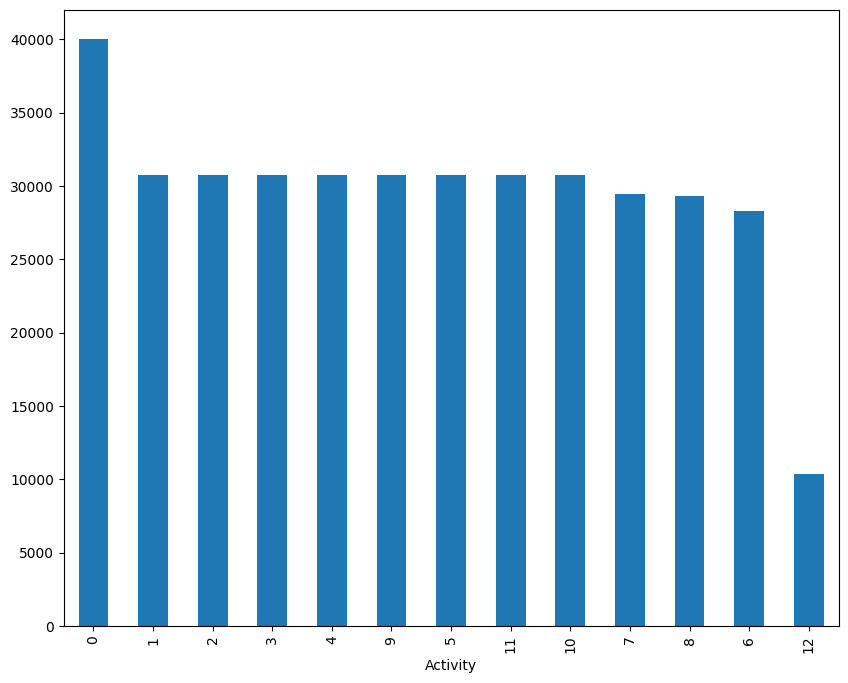

In [15]:
plt.figure(figsize=(10,8))
df['Activity'].value_counts().plot.bar()

In [16]:
len(df)

383195

In [17]:
activity_label ={
    1: "Standing still (1 min)",
    2: "Sitting and relaxing (1 min)",
    3: "Lying down (1 min)",
    4: "Walking (1 min)",
    5: "Climbing stairs (1 min)",
    6: "Waist bends forward (20x)",
    7: "Frontal elevation of arms (20x)",
    8: "Knees bending (crouching) (20x)",
    9: "Cycling (1 min)",
    10: "Jogging (1 min)",
    11: "Running (1 min)",
    12: "Jump front & back (20x)",
}

================Standing still (1 min) a================


KeyError: 'ax'

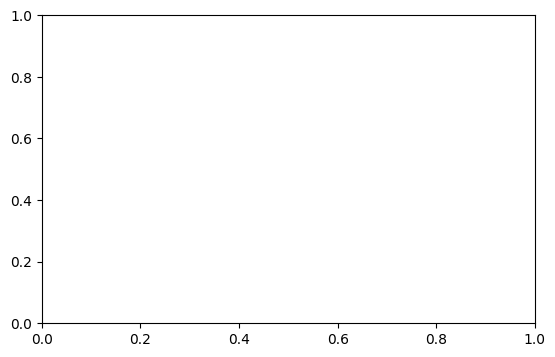

In [18]:
subject1 = df[df['subject'] == 'subject1']
readings = ['a', 'g']

for i in range(1, 13):
    for r in readings:
        print(f"================{activity_label[i]} {r}================")
        plt.figure(figsize=(14, 4))

        plt.subplot(1, 2, 1)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'x'],
                 color='blue', alpha=0.7, label=r + 'x')
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'y'],
                 color='red', alpha=0.7, label=r + 'y')
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'z'],
                 color='orange', alpha=0.7, label=r + 'z')
        plt.title("Left ankle sensor")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'x'],
                 color='blue', alpha=0.7, label=r + 'x')
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'y'],
                 color='red', alpha=0.7, label=r + 'y')
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'z'],
                 color='orange', alpha=0.7, label=r + 'z')
        plt.title("Left ankle sensor")
        plt.legend()
        plt.show()

================ Standing still (1 min) a ================


KeyError: 'ax'

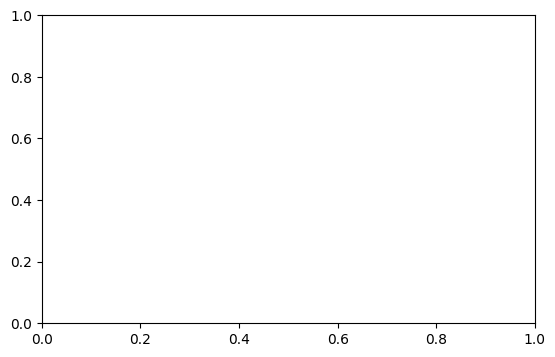

In [19]:
# Subject filter
subject1 = df[df['subject'] == 'subject1']
readings = ['a', 'g']

for i in range(1, 13):
    for r in readings:
        print(f"================ {activity_label[i]} {r} ================")
        plt.figure(figsize=(14, 4))

        plt.subplot(1, 2, 1)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'x'],
                 color='blue', alpha=0.7, label=r + 'x')
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'y'],
                 color='red', alpha=0.7, label=r + 'y')
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'z'],
                 color='orange', alpha=0.7, label=r + 'z')
        plt.title("Left ankle sensor")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'x'],
                 color='blue', alpha=0.7, label=r + 'x')
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'y'],
                 color='red', alpha=0.7, label=r + 'y')
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'z'],
                 color='orange', alpha=0.7, label=r + 'z')
        plt.title("Left ankle sensor")
        plt.legend()
        plt.show()


In [20]:
print(df.columns)

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject'],
      dtype='object')


In [21]:
import matplotlib.pyplot as plt

subject1 = df[df['subject'] == 'subject1']

for i in range(1, 13):  # 12 activities
    for sensor_name, cols in sensors.items():
        print(f"================ {activity_label[i]} | {sensor_name} ================")
        plt.figure(figsize=(14, 4))

        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[cols[0]],
                 color='blue', alpha=0.7, label=cols[0])
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[cols[1]],
                 color='red', alpha=0.7, label=cols[1])
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[cols[2]],
                 color='orange', alpha=0.7, label=cols[2])

        plt.title(sensor_name)
        plt.legend()
        plt.show()


NameError: name 'sensors' is not defined

In [22]:
# Define sensors mapping
sensors = {
    "Left Ankle Acc": ["alx", "aly", "alz"],
    "Left Ankle Gyro": ["glx", "gly", "glz"],
    "Right Ankle Acc": ["arx", "ary", "arz"],
    "Right Ankle Gyro": ["grx", "gry", "grz"]
}

# Activity labels (agar already define nahi kiya)
activity_label = {
    1: "Standing",
    2: "Walking",
    3: "Running",
    4: "Sitting",
    5: "Climbing Stairs",
    6: "Descending Stairs",
    7: "Cycling",
    8: "Jogging",
    9: "Jumping",
    10: "Lying",
    11: "Bending",
    12: "Others"
}


================ Standing | Left Ankle Acc ================


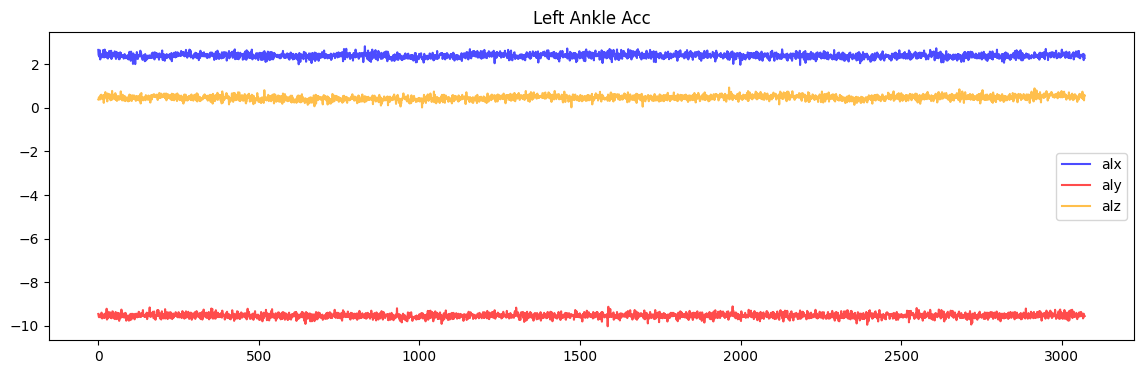

================ Standing | Left Ankle Gyro ================


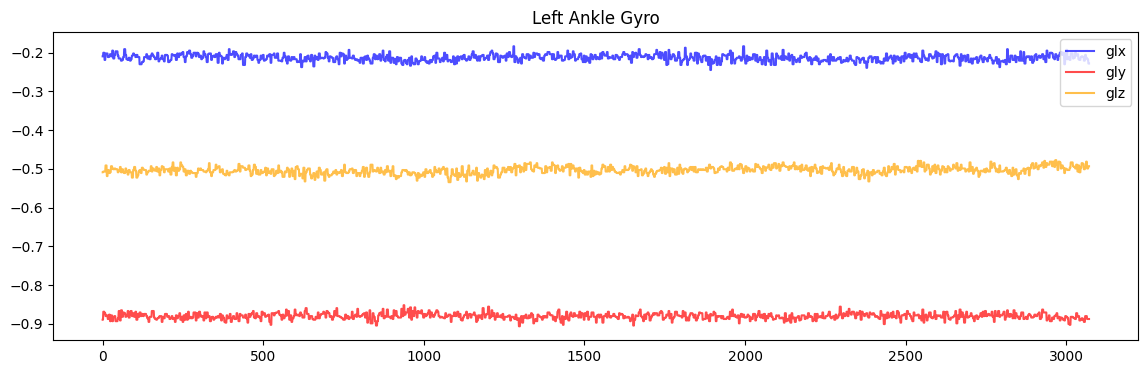

================ Standing | Right Ankle Acc ================


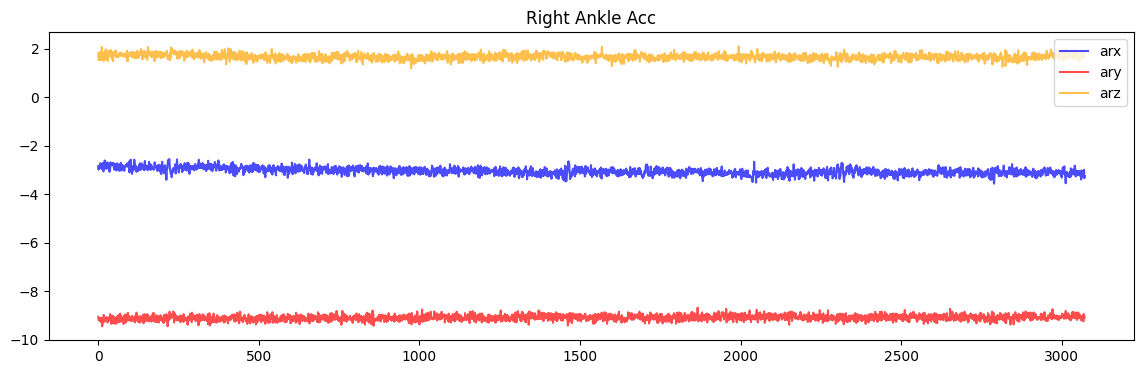

================ Standing | Right Ankle Gyro ================


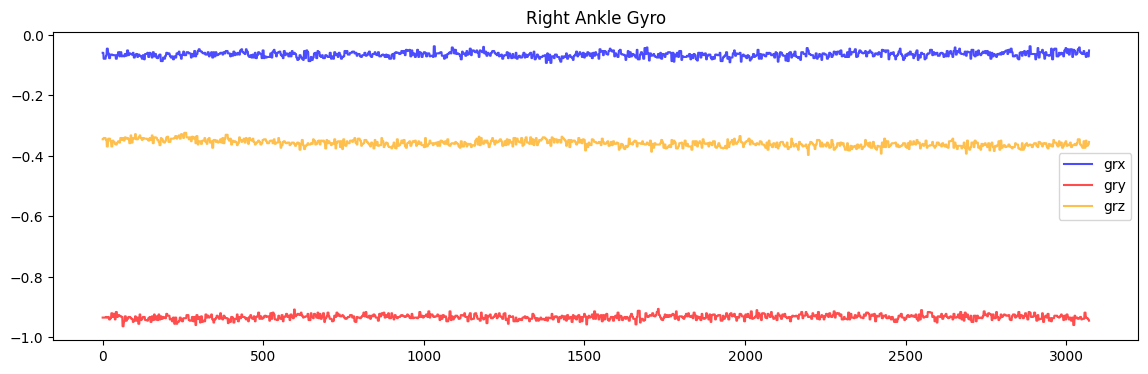

================ Walking | Left Ankle Acc ================


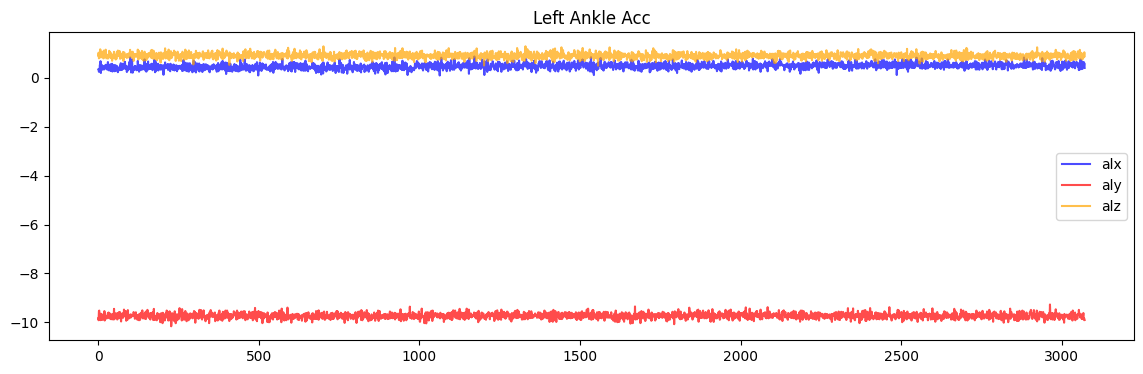

================ Walking | Left Ankle Gyro ================


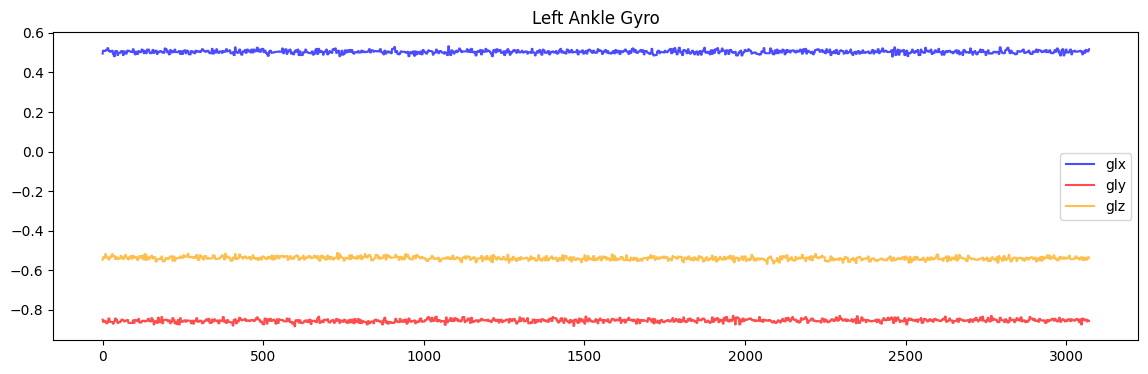

================ Walking | Right Ankle Acc ================


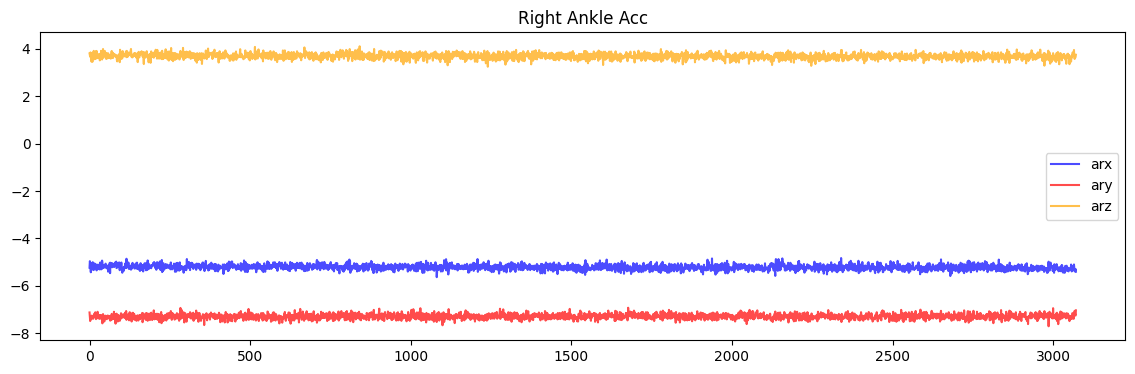

================ Walking | Right Ankle Gyro ================


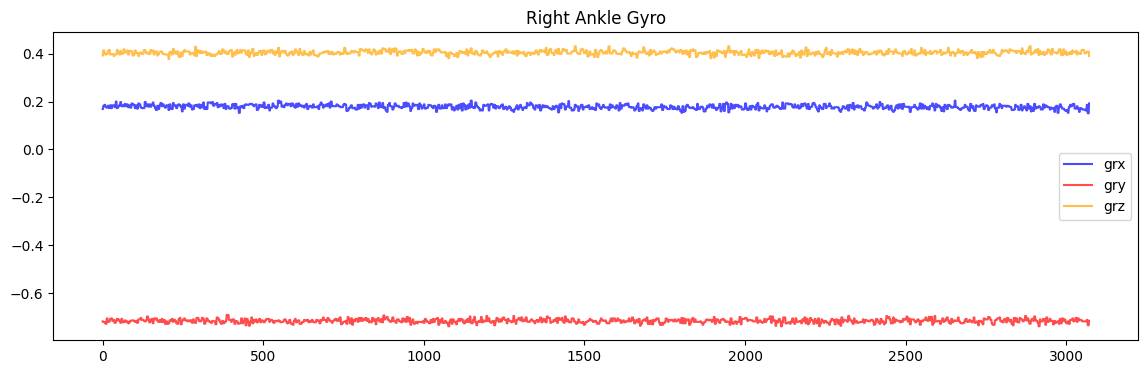

================ Running | Left Ankle Acc ================


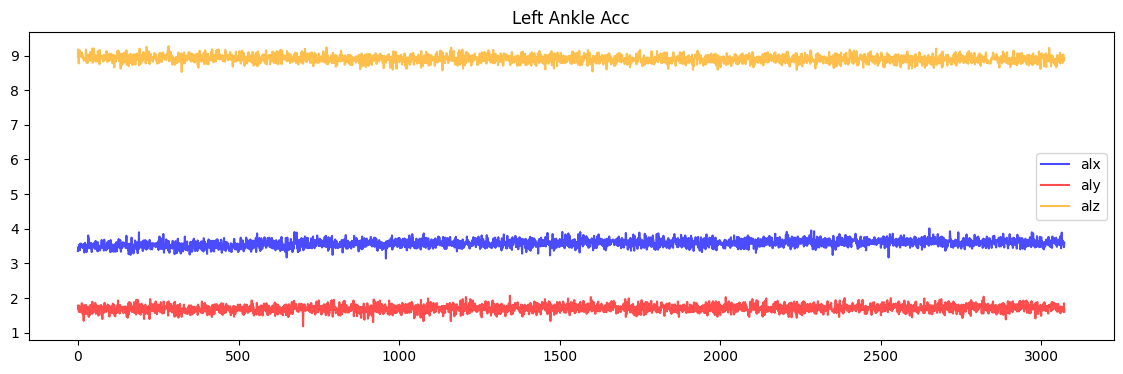

================ Running | Left Ankle Gyro ================


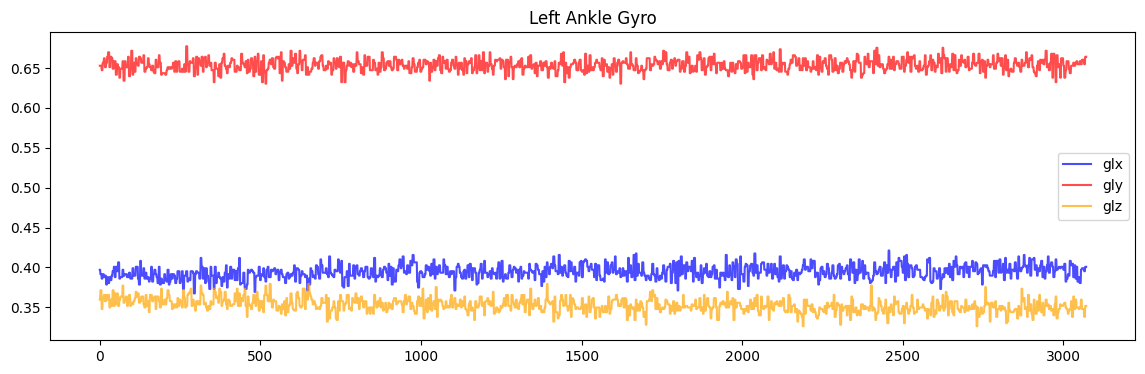

================ Running | Right Ankle Acc ================


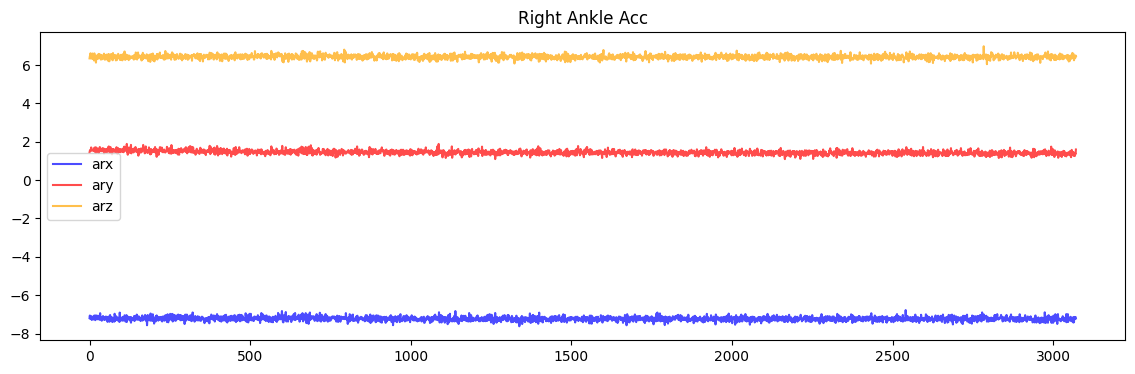

================ Running | Right Ankle Gyro ================


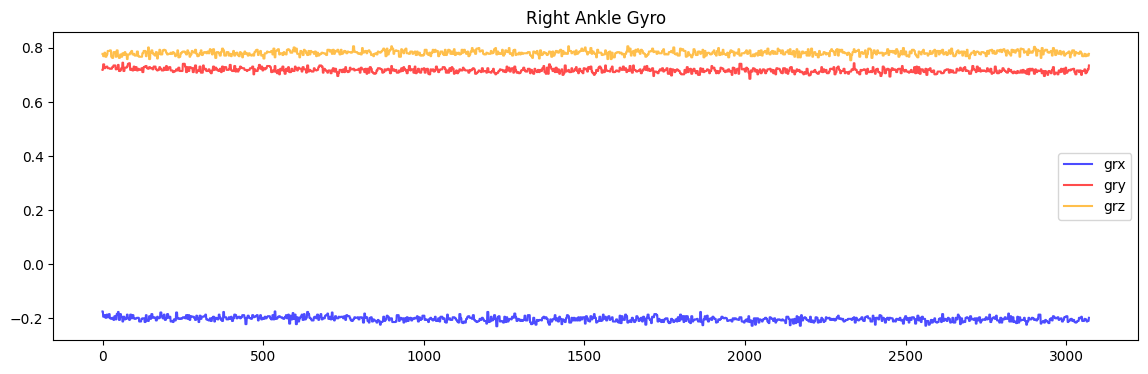

================ Sitting | Left Ankle Acc ================


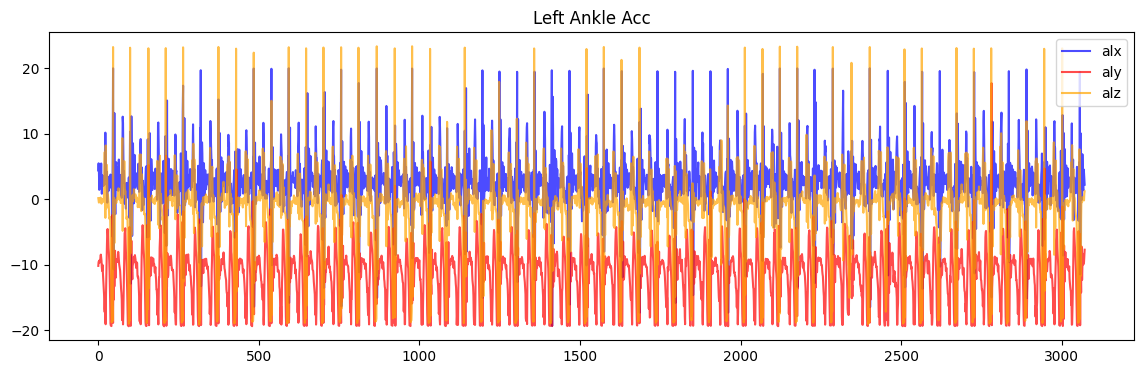

================ Sitting | Left Ankle Gyro ================


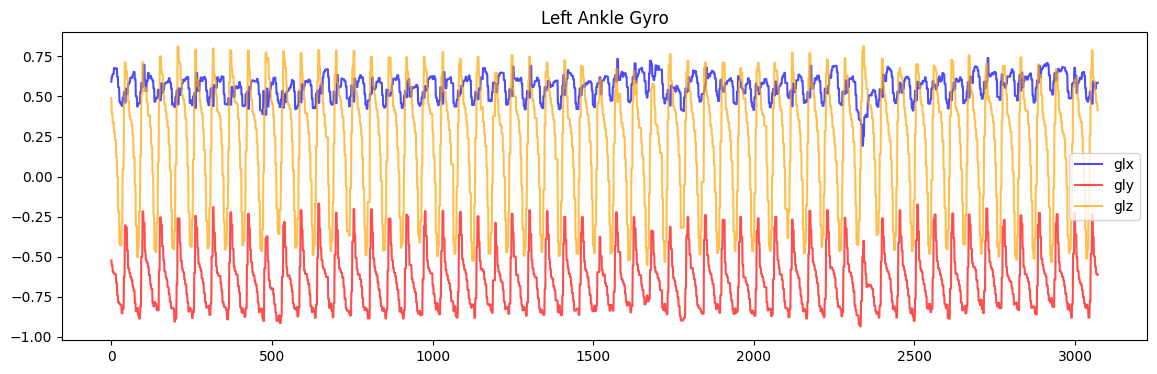

================ Sitting | Right Ankle Acc ================


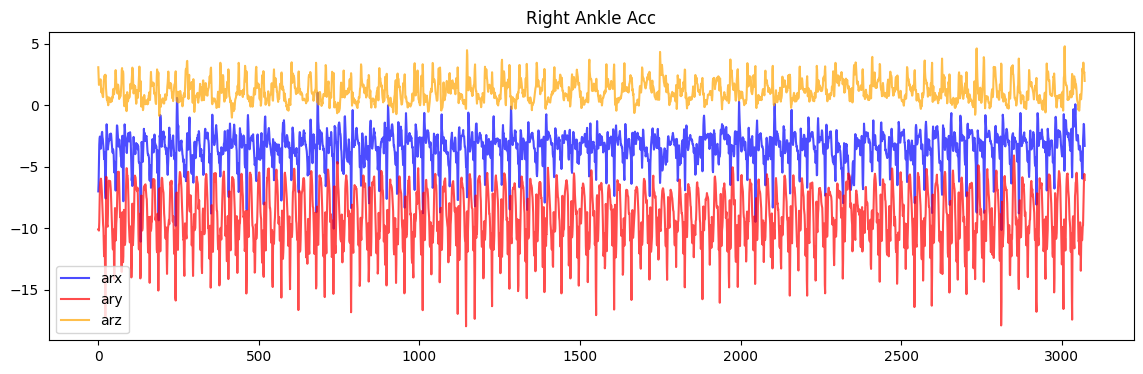

================ Sitting | Right Ankle Gyro ================


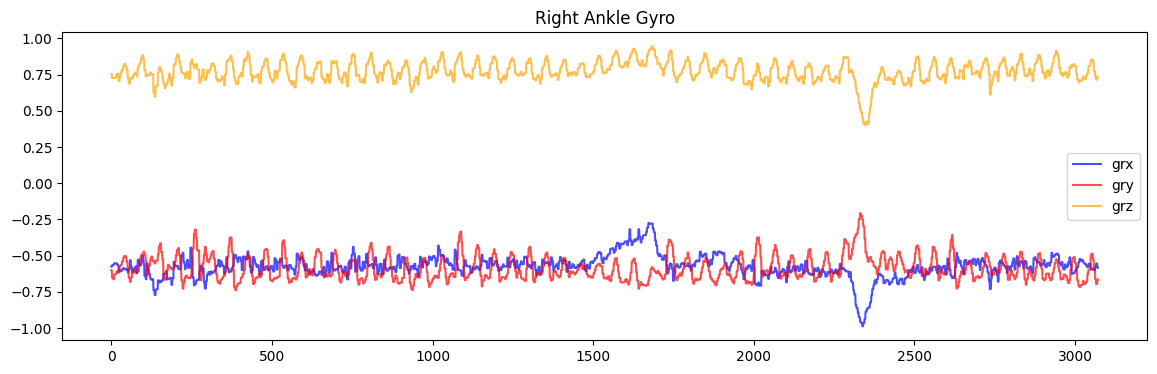

================ Climbing Stairs | Left Ankle Acc ================


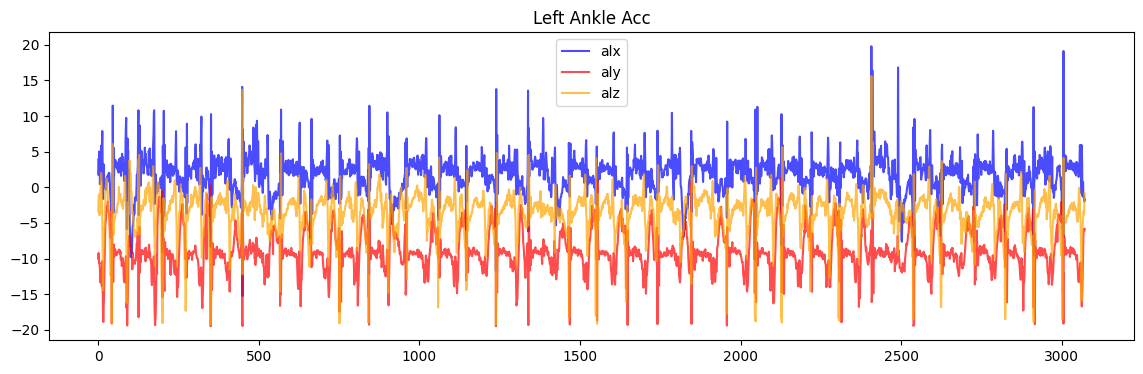

================ Climbing Stairs | Left Ankle Gyro ================


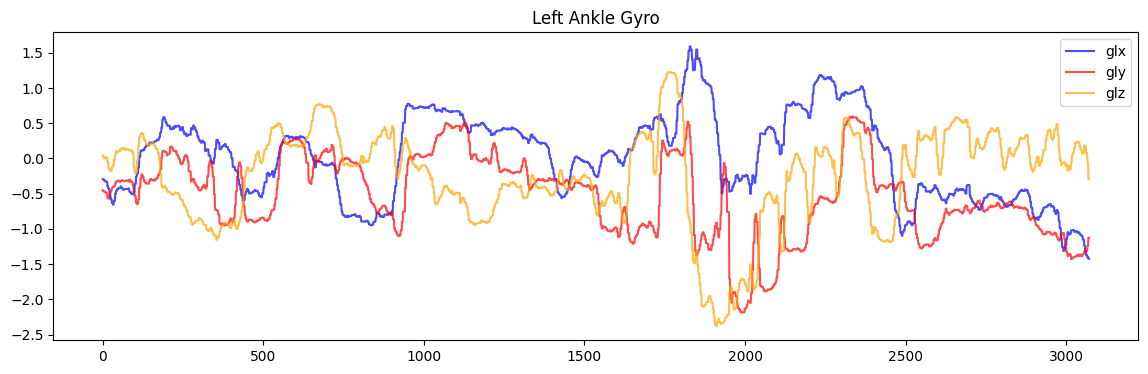

================ Climbing Stairs | Right Ankle Acc ================


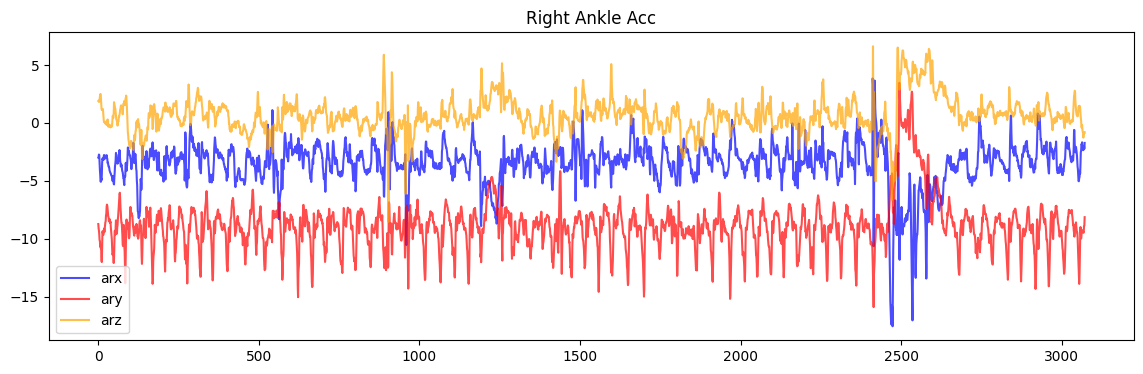

================ Climbing Stairs | Right Ankle Gyro ================


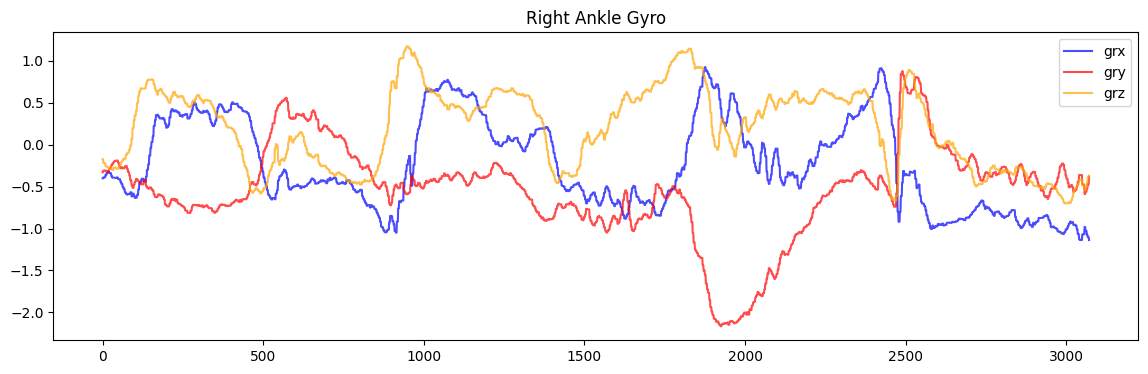

================ Descending Stairs | Left Ankle Acc ================


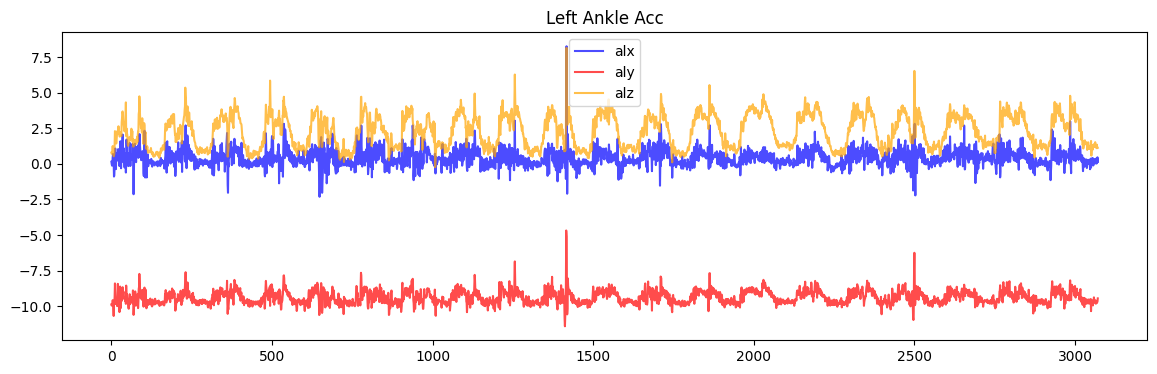

================ Descending Stairs | Left Ankle Gyro ================


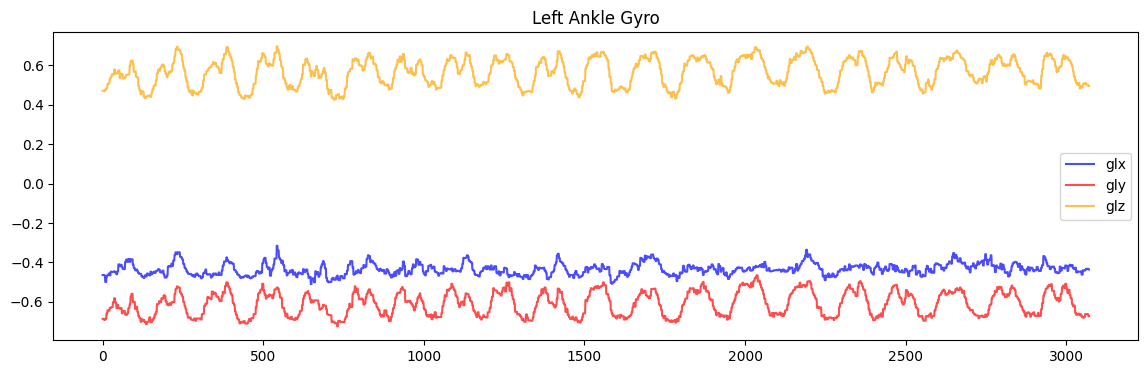

================ Descending Stairs | Right Ankle Acc ================


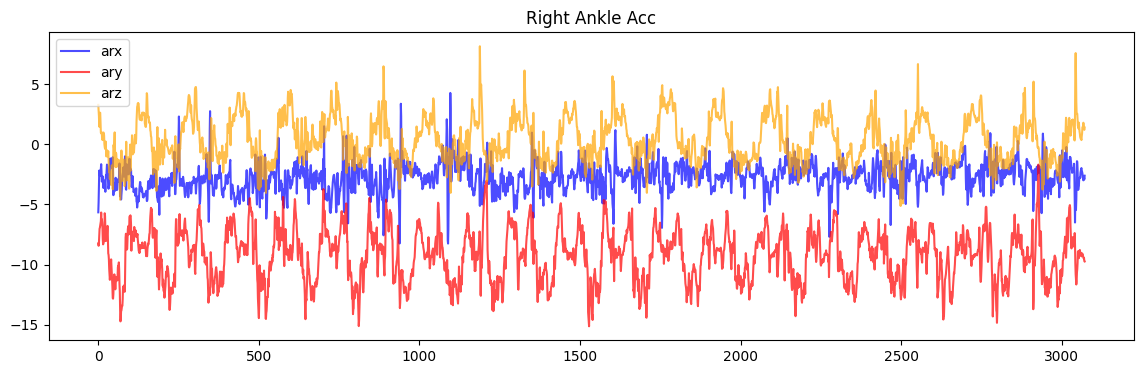

================ Descending Stairs | Right Ankle Gyro ================


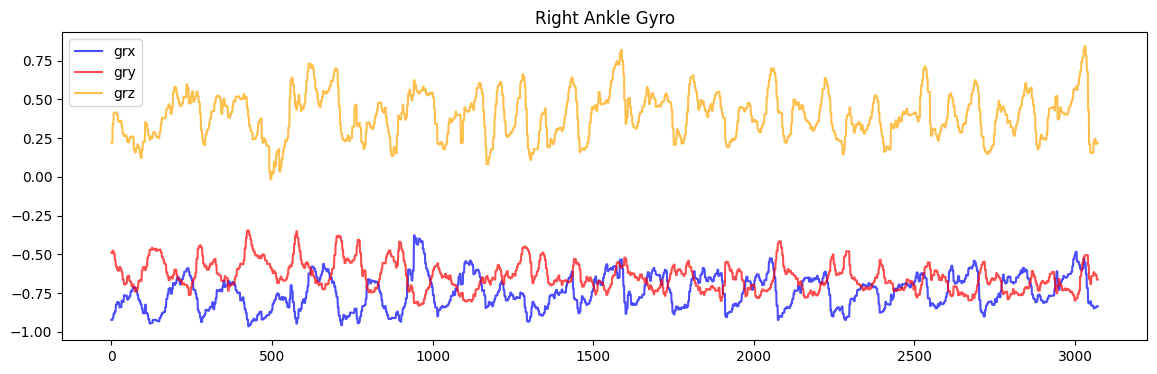

================ Cycling | Left Ankle Acc ================


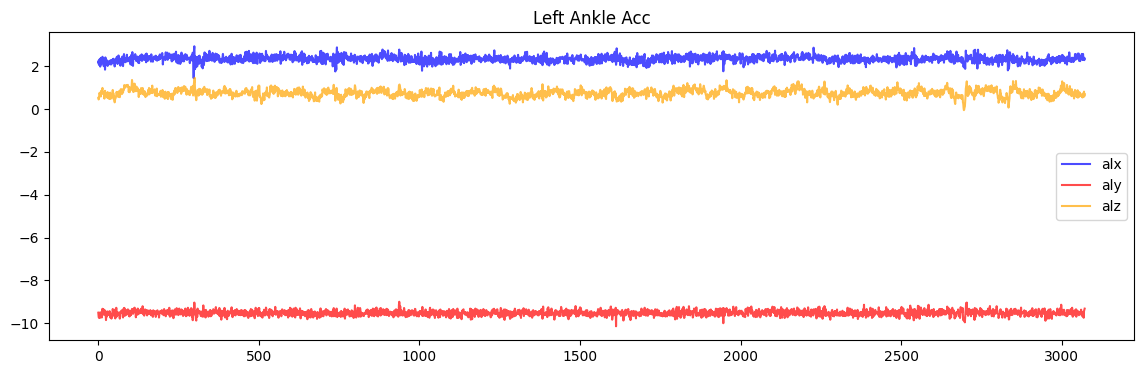

================ Cycling | Left Ankle Gyro ================


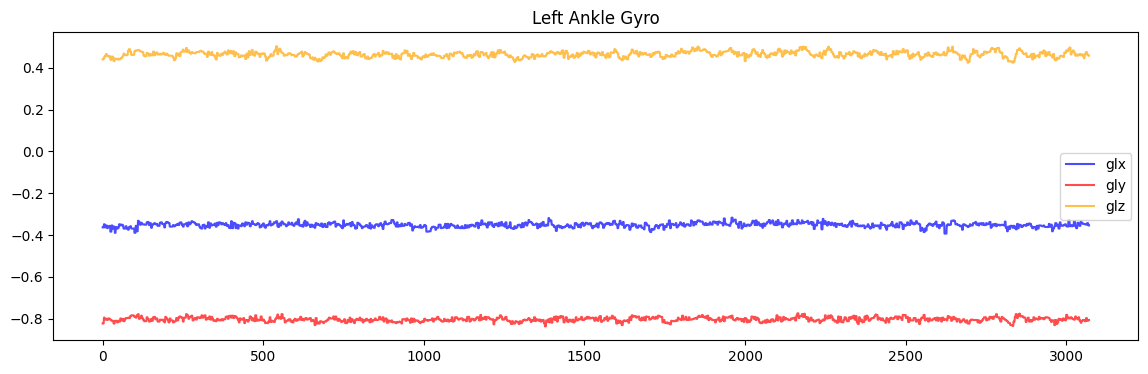

================ Cycling | Right Ankle Acc ================


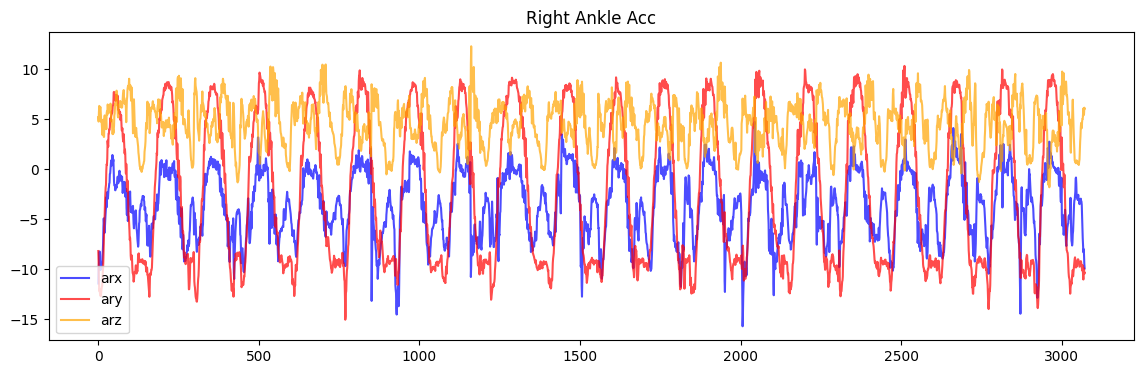

================ Cycling | Right Ankle Gyro ================


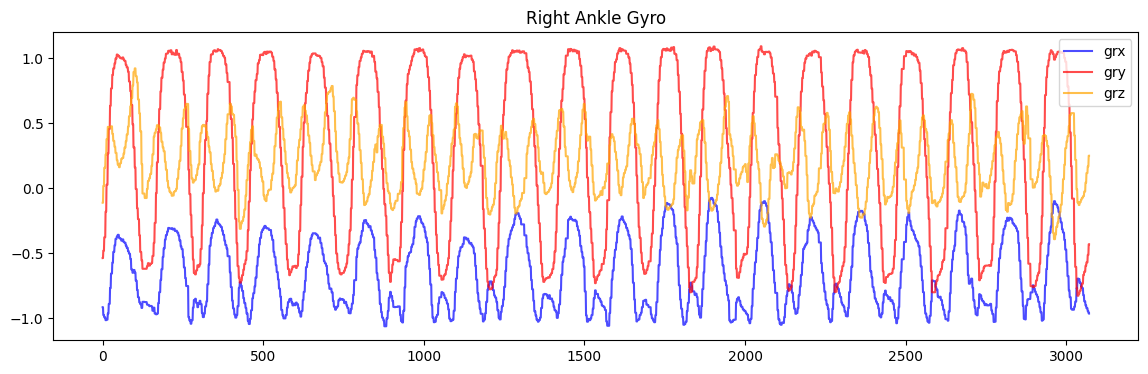

================ Jogging | Left Ankle Acc ================


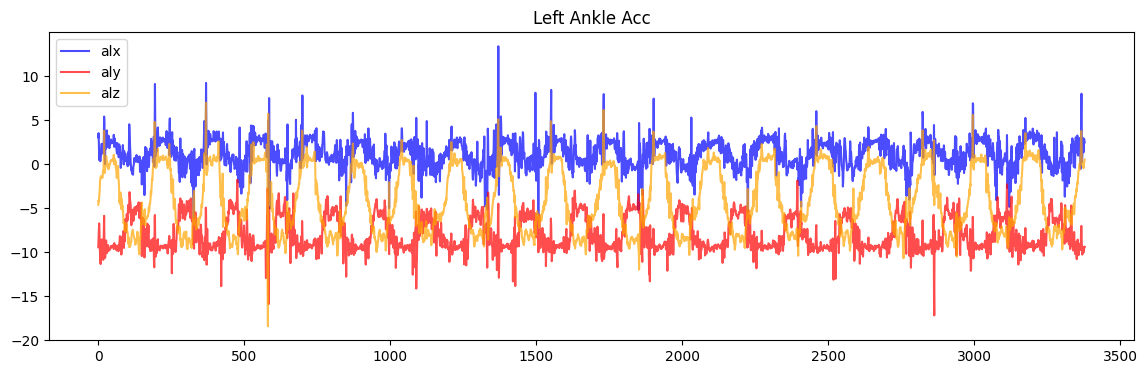

================ Jogging | Left Ankle Gyro ================


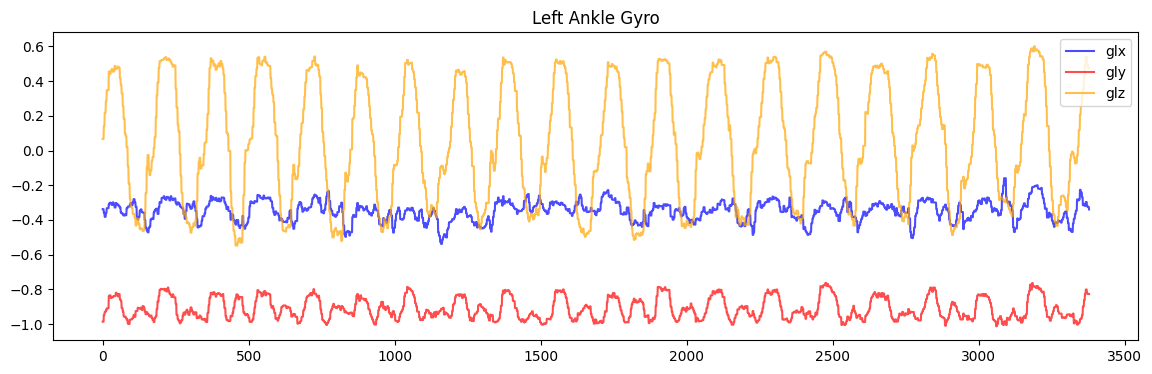

================ Jogging | Right Ankle Acc ================


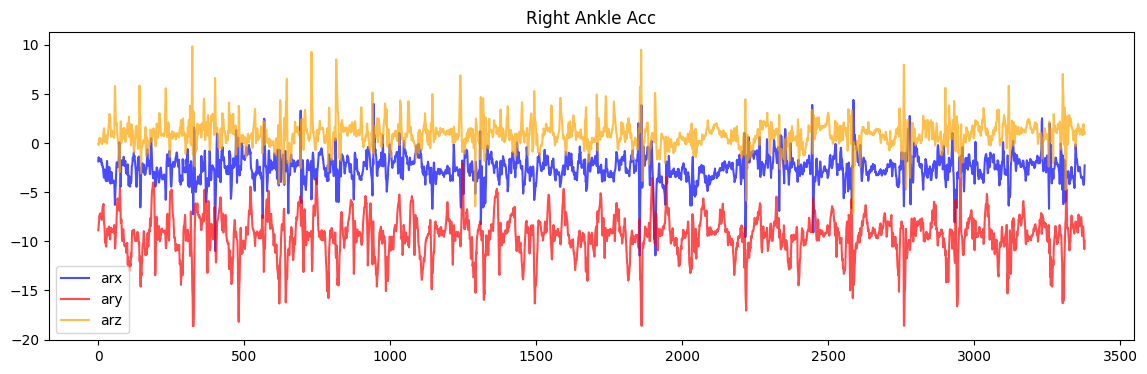

================ Jogging | Right Ankle Gyro ================


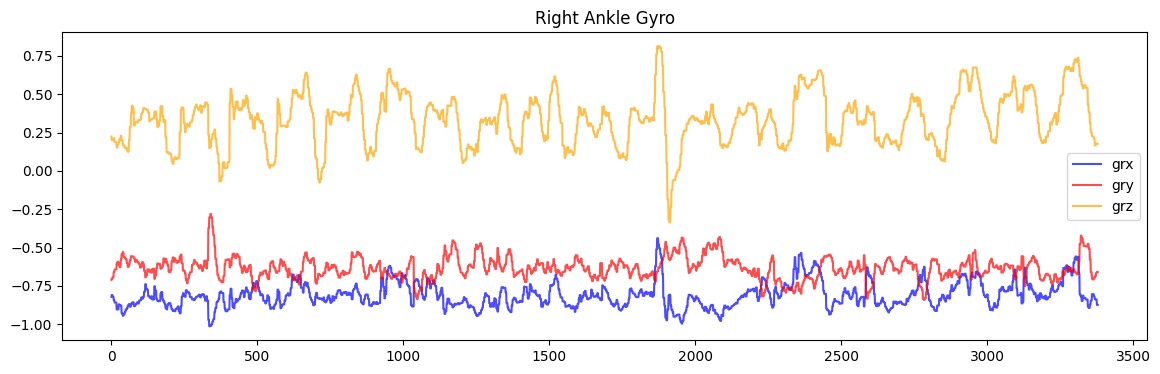

================ Jumping | Left Ankle Acc ================


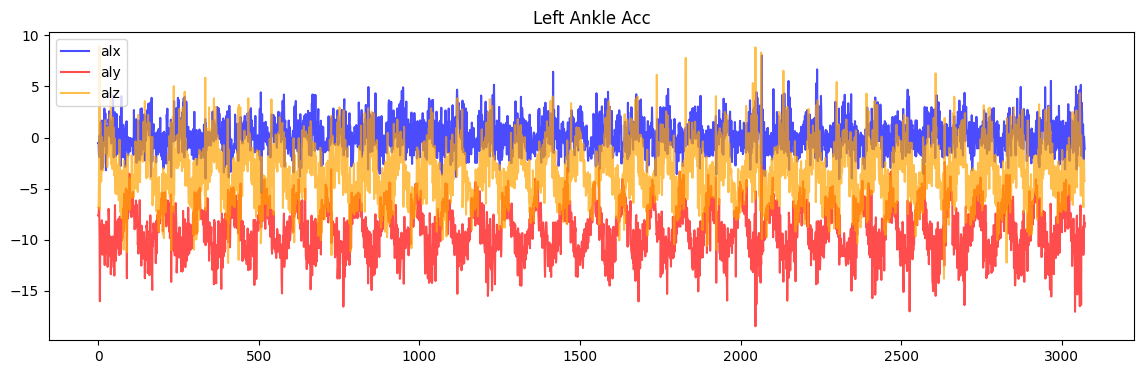

================ Jumping | Left Ankle Gyro ================


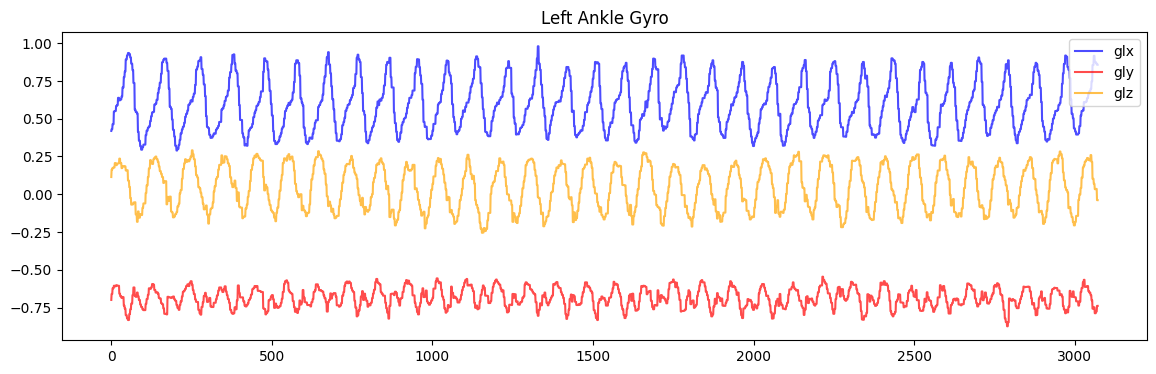

================ Jumping | Right Ankle Acc ================


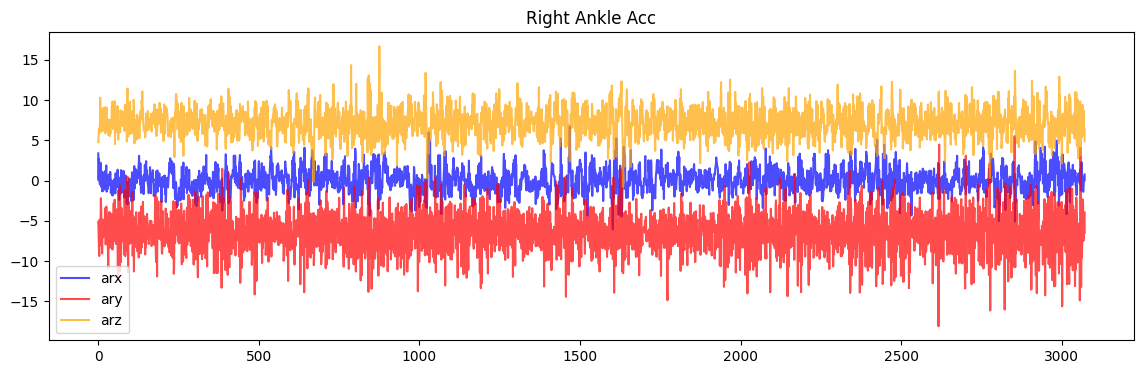

================ Jumping | Right Ankle Gyro ================


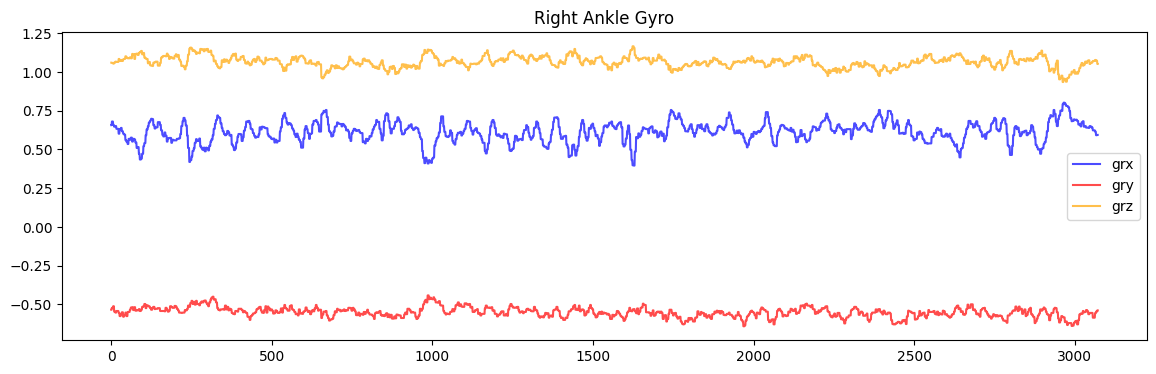

================ Lying | Left Ankle Acc ================


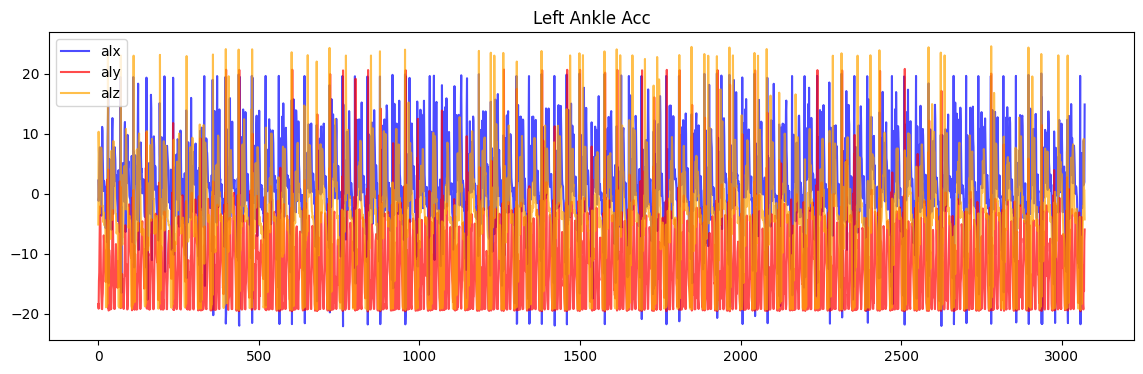

================ Lying | Left Ankle Gyro ================


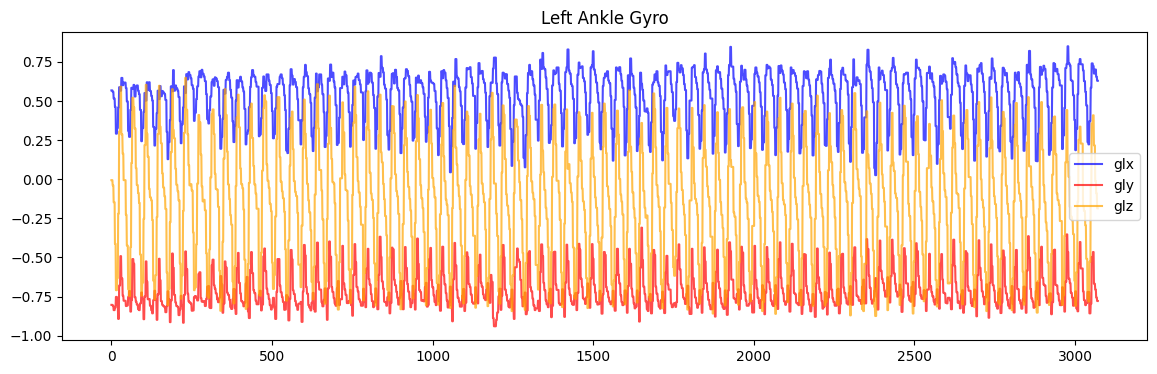

================ Lying | Right Ankle Acc ================


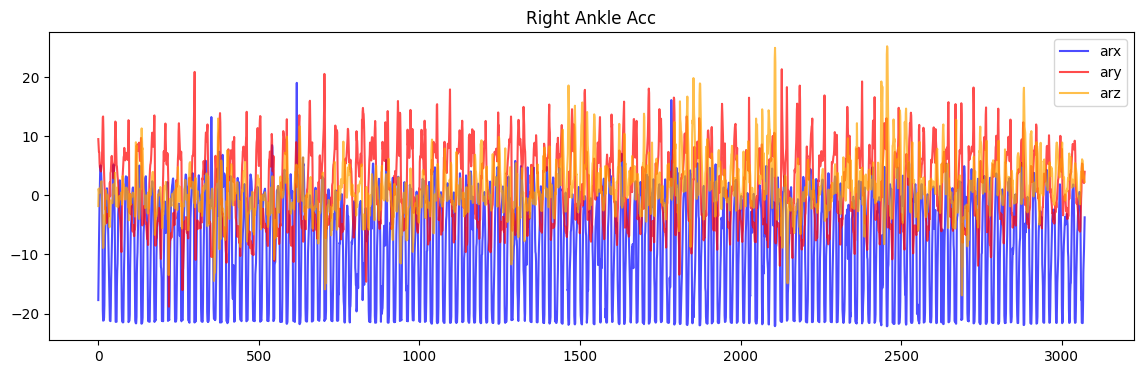

================ Lying | Right Ankle Gyro ================


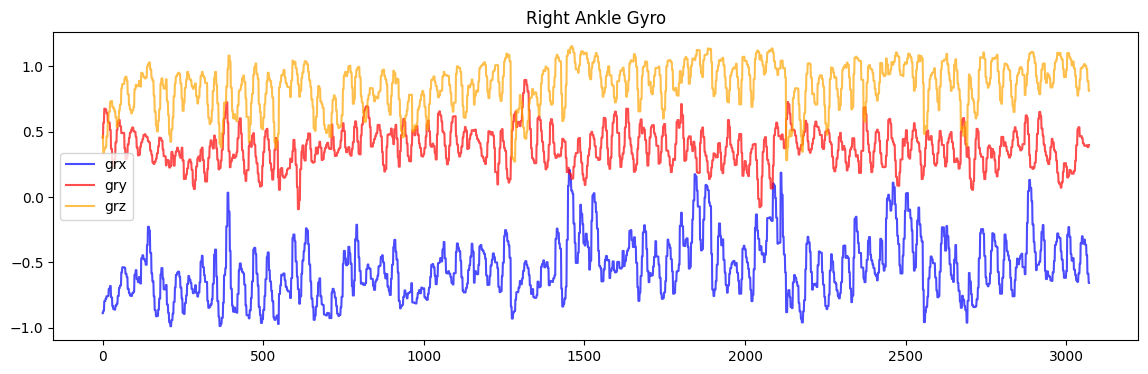

================ Bending | Left Ankle Acc ================


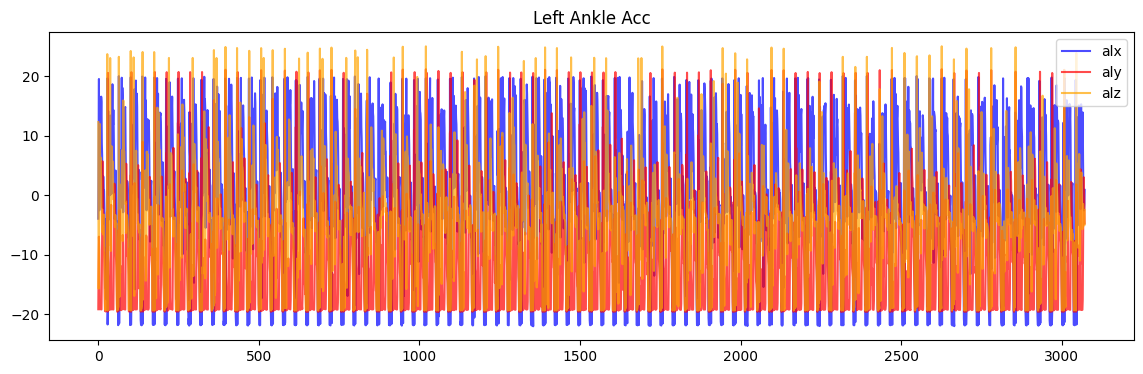

================ Bending | Left Ankle Gyro ================


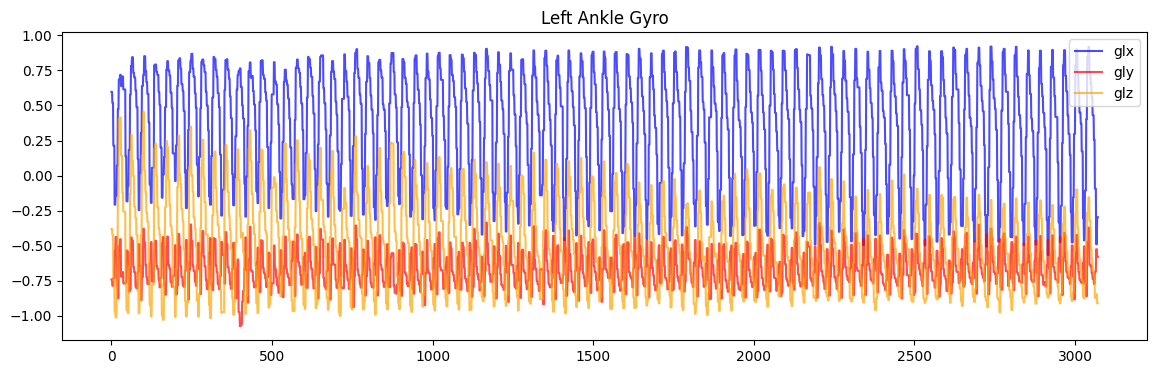

================ Bending | Right Ankle Acc ================


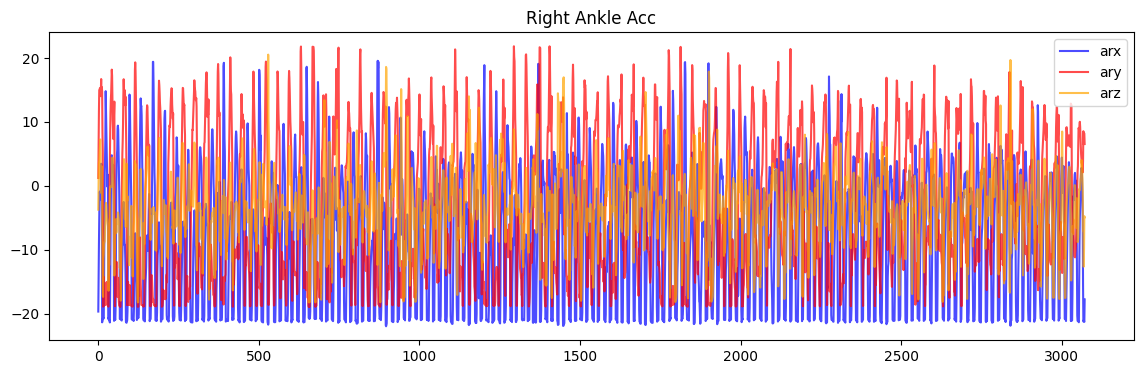

================ Bending | Right Ankle Gyro ================


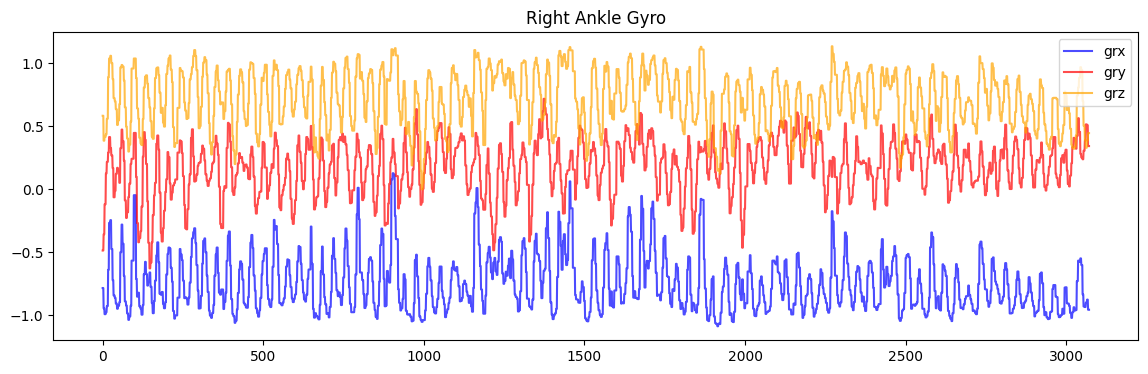

================ Others | Left Ankle Acc ================


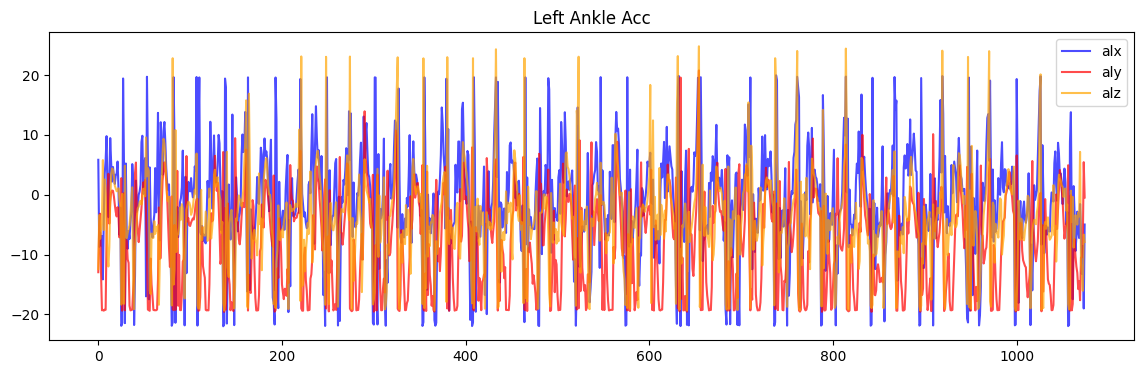

================ Others | Left Ankle Gyro ================


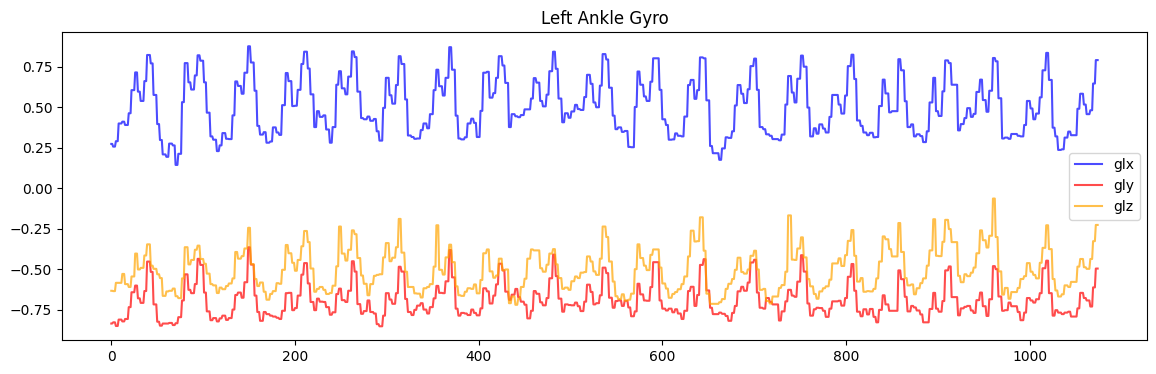

================ Others | Right Ankle Acc ================


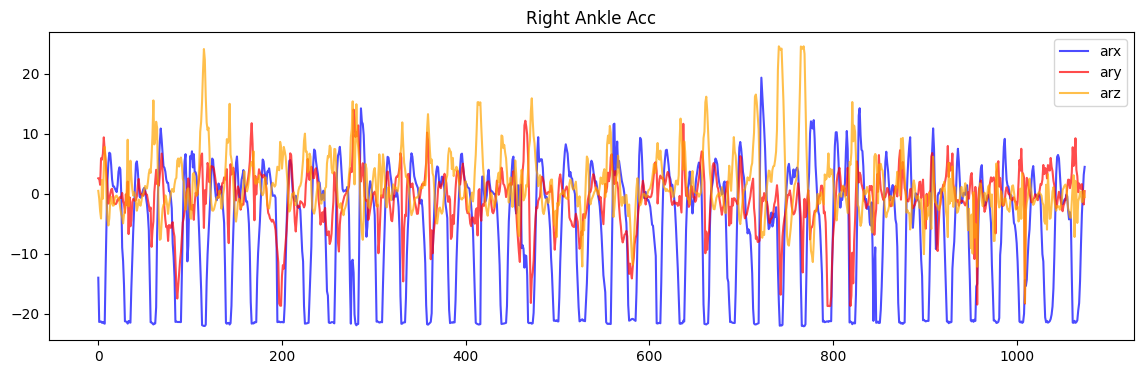

================ Others | Right Ankle Gyro ================


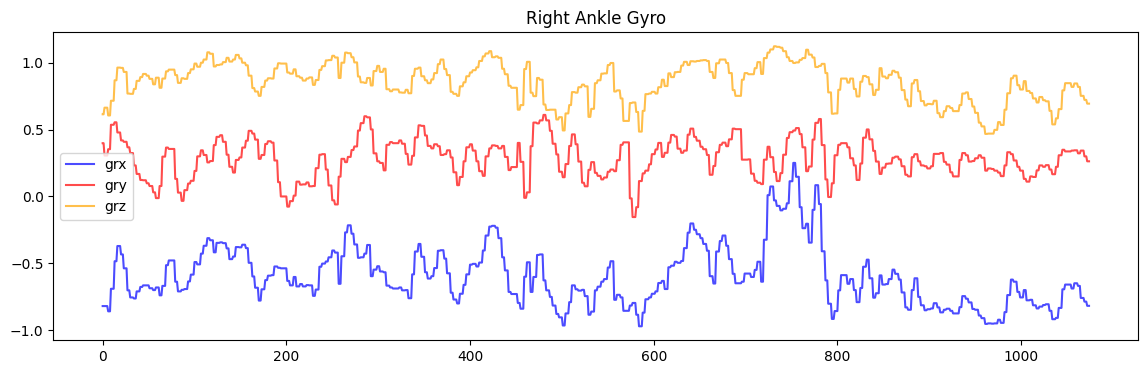

In [23]:
import matplotlib.pyplot as plt

subject1 = df[df['subject'] == 'subject1']

for i in range(1, 13):  # 12 activities
    for sensor_name, cols in sensors.items():
        print(f"================ {activity_label[i]} | {sensor_name} ================")
        plt.figure(figsize=(14, 4))

        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[cols[0]],
                 color='blue', alpha=0.7, label=cols[0])
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[cols[1]],
                 color='red', alpha=0.7, label=cols[1])
        plt.plot(subject1[subject1['Activity'] == i].reset_index(drop=True)[cols[2]],
                 color='orange', alpha=0.7, label=cols[2])

        plt.title(sensor_name)
        plt.legend()
        plt.show()


================Standing a================


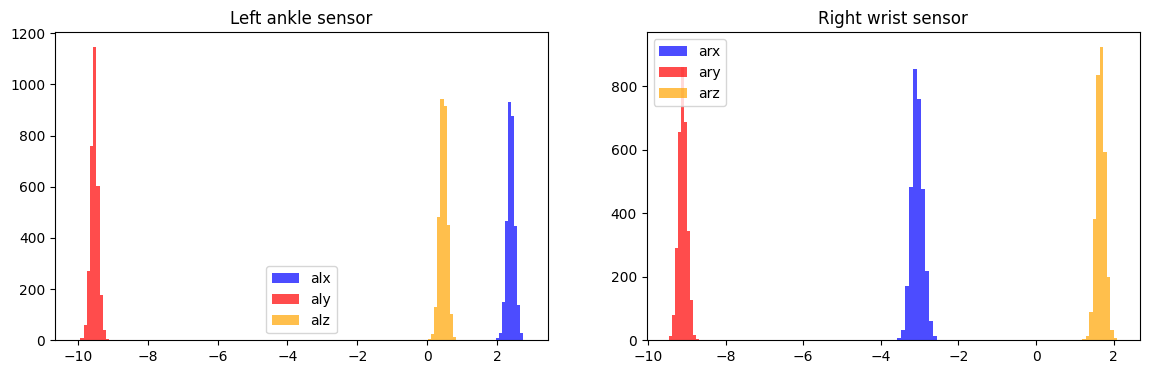

================Standing g================


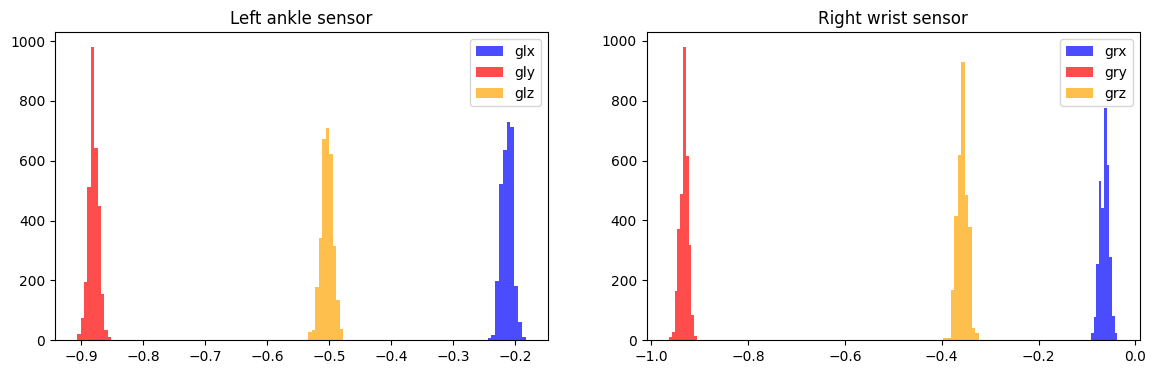

================Walking a================


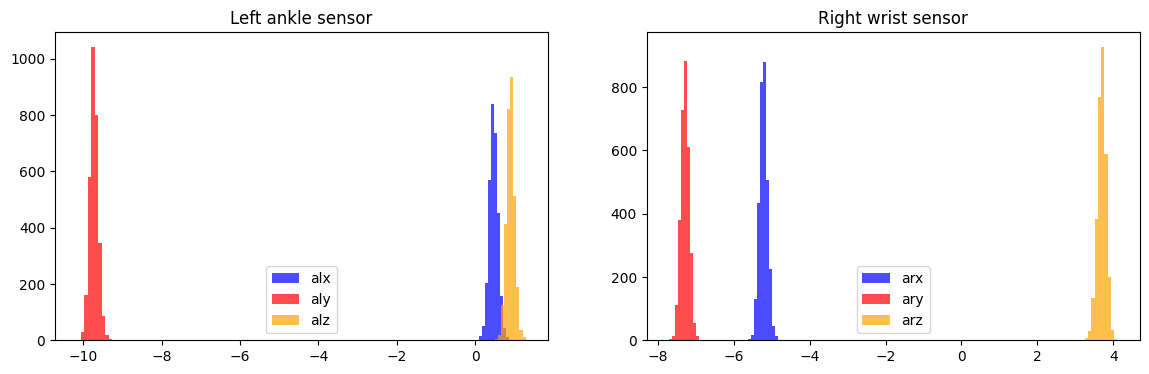

================Walking g================


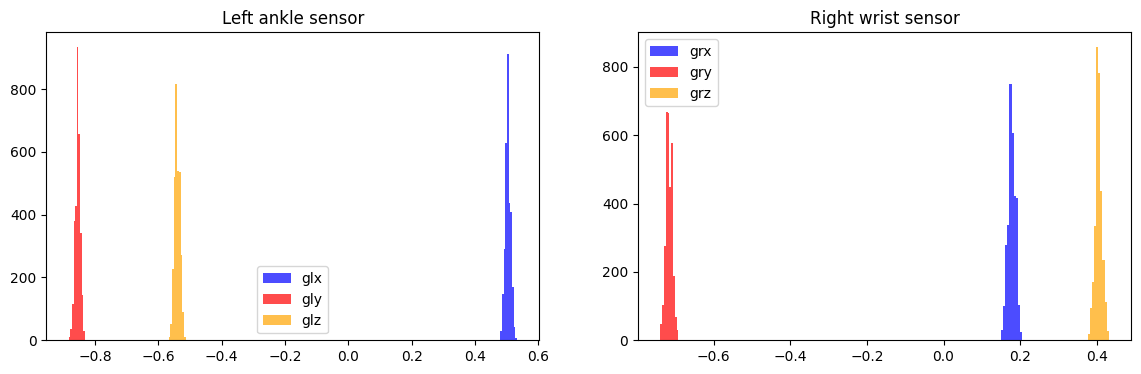

================Running a================


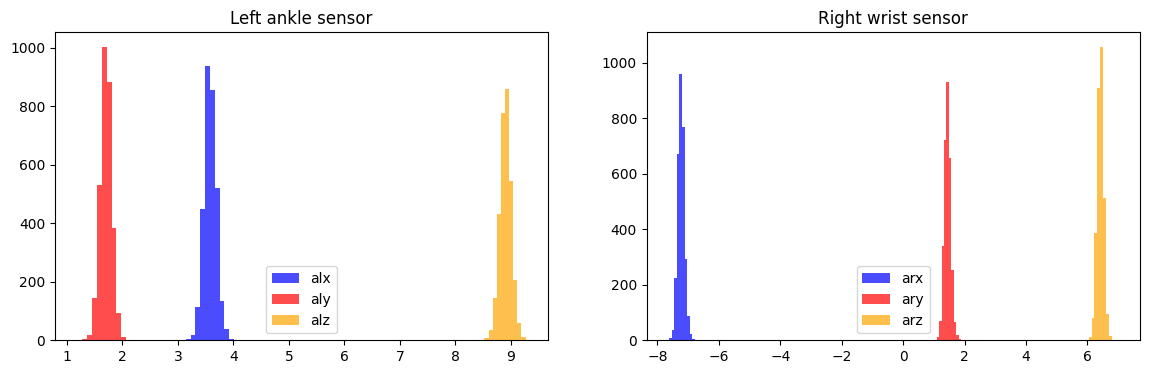

================Running g================


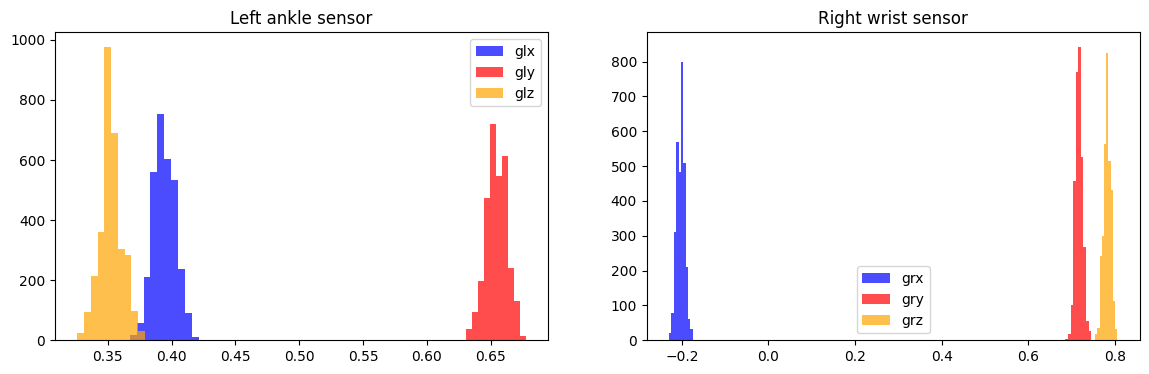

================Sitting a================


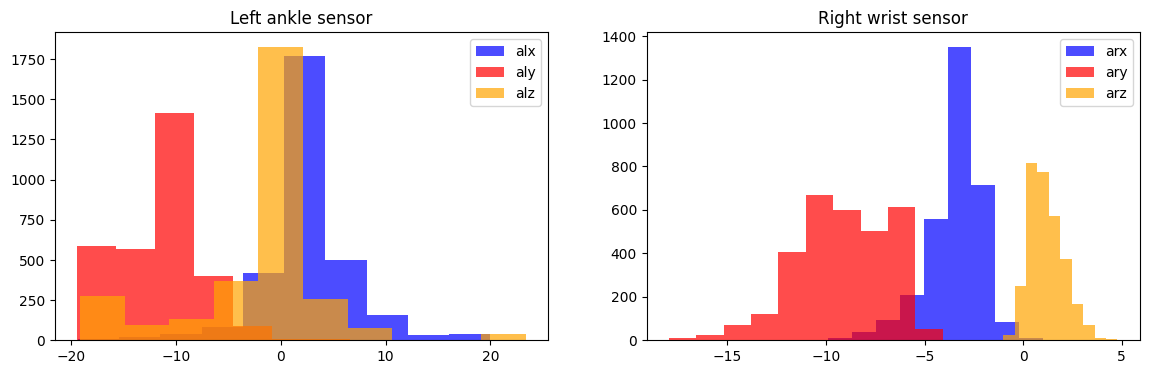

================Sitting g================


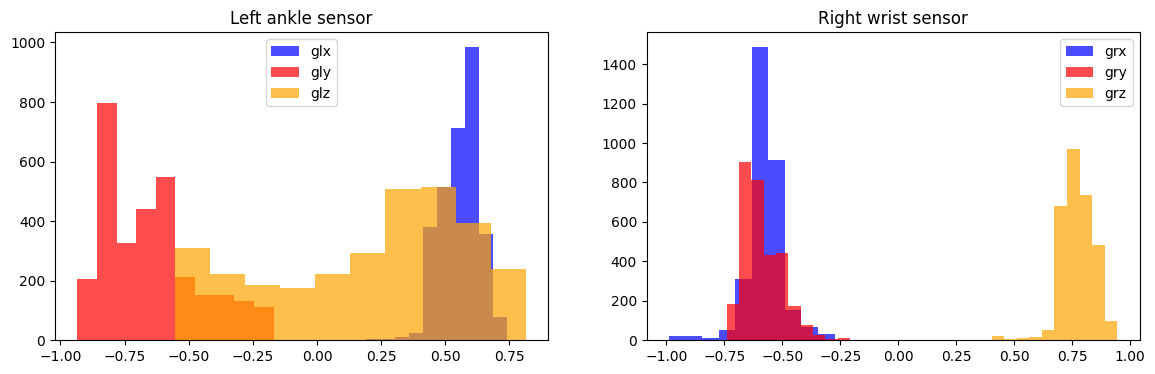

================Climbing Stairs a================


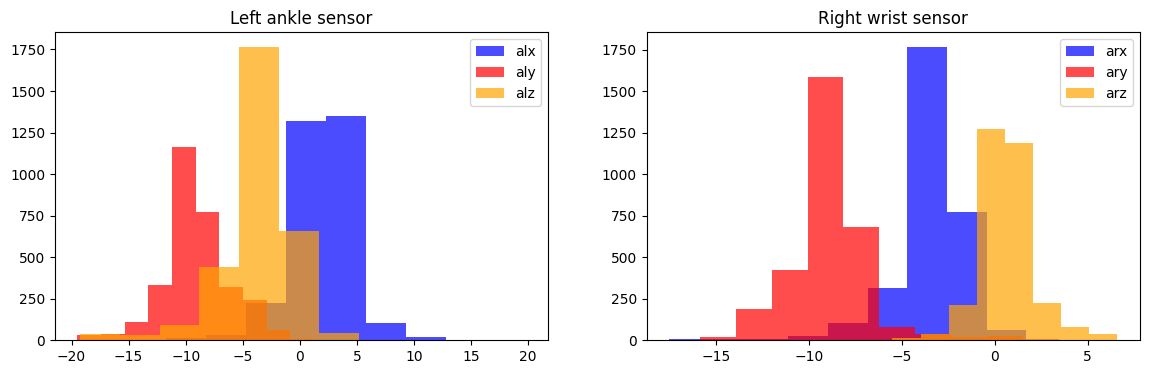

================Climbing Stairs g================


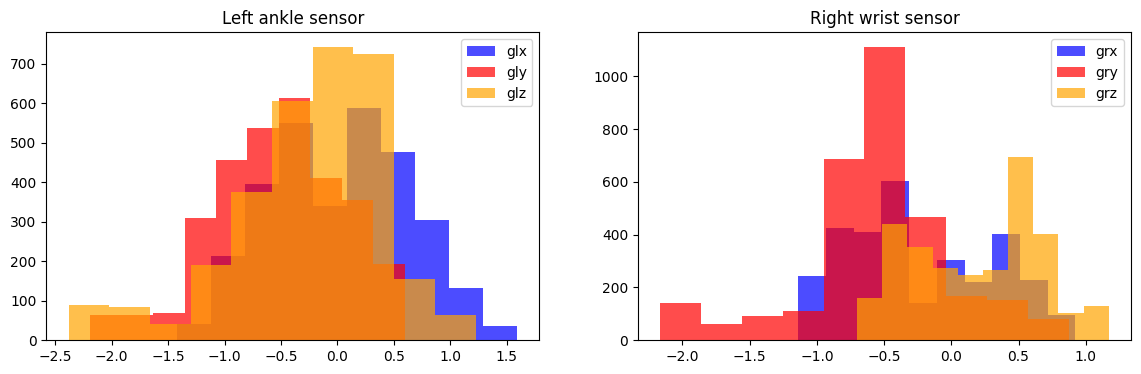

================Descending Stairs a================


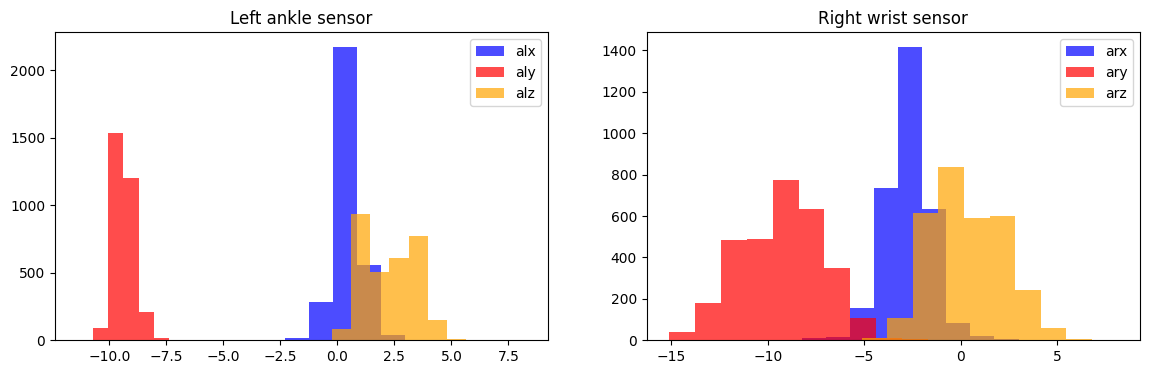

================Descending Stairs g================


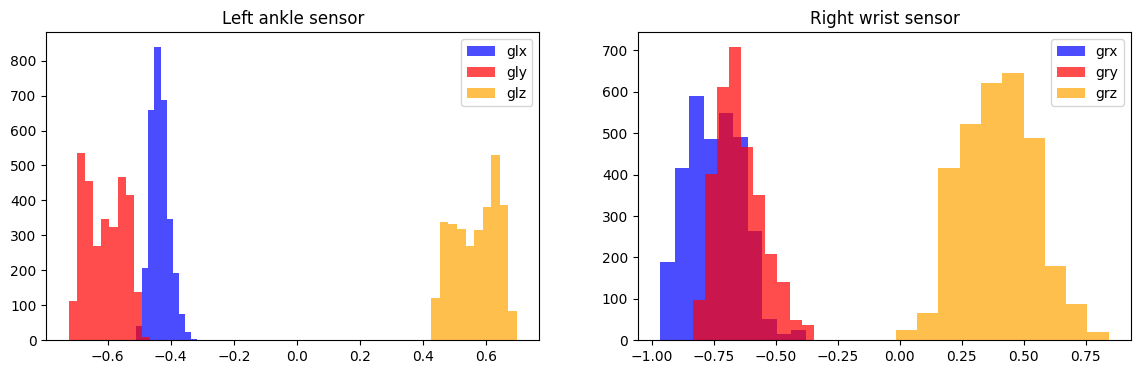

================Cycling a================


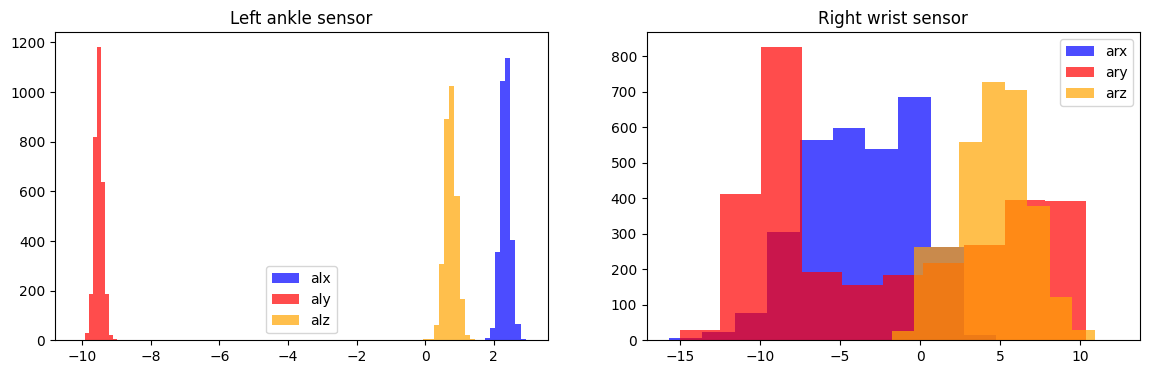

================Cycling g================


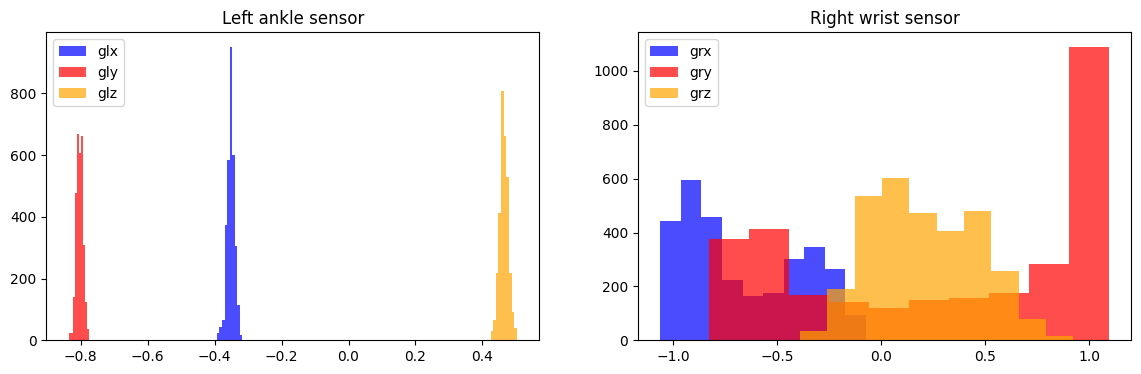

================Jogging a================


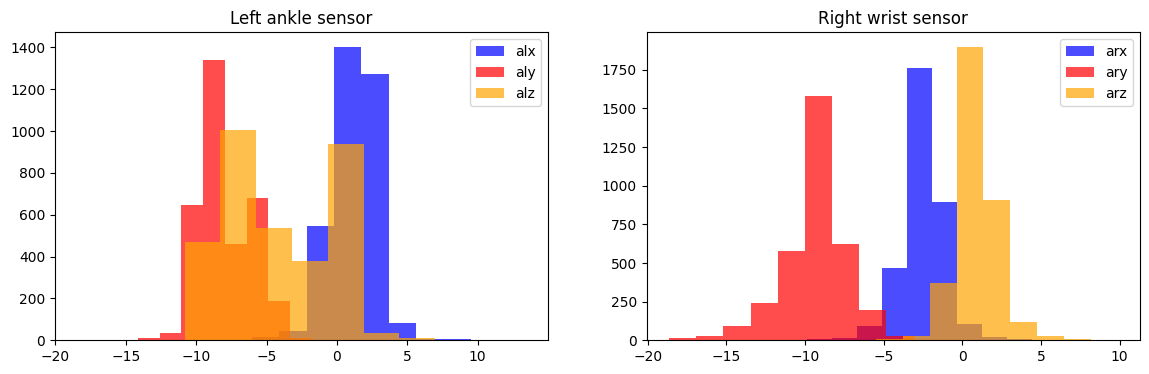

================Jogging g================


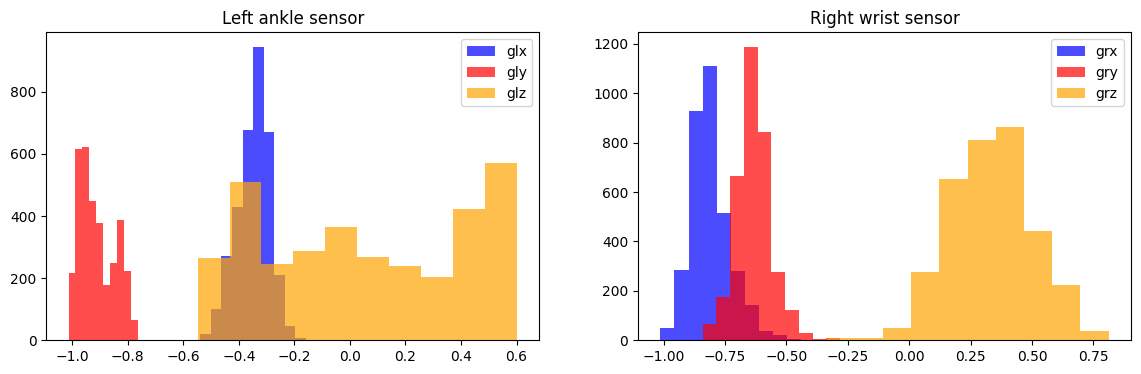

================Jumping a================


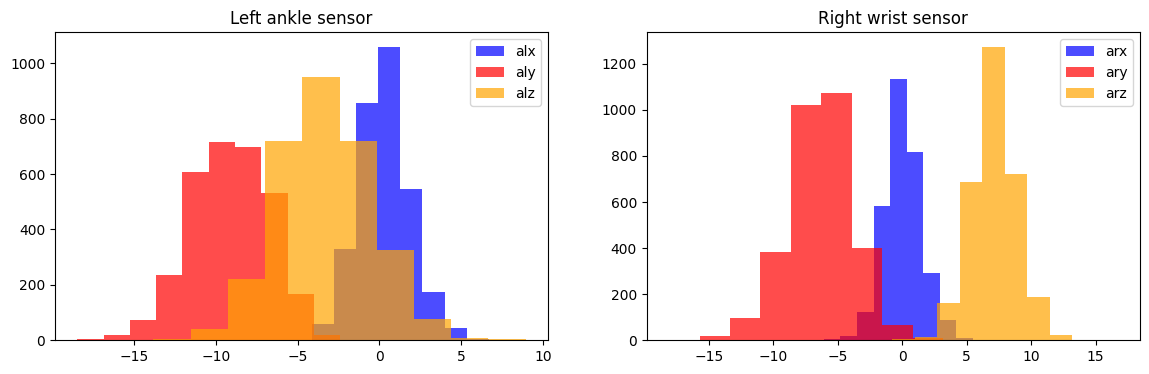

================Jumping g================


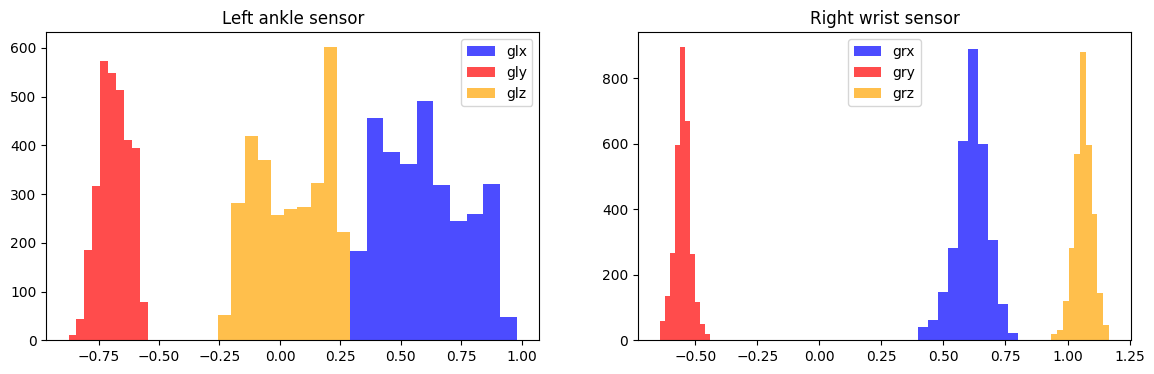

================Lying a================


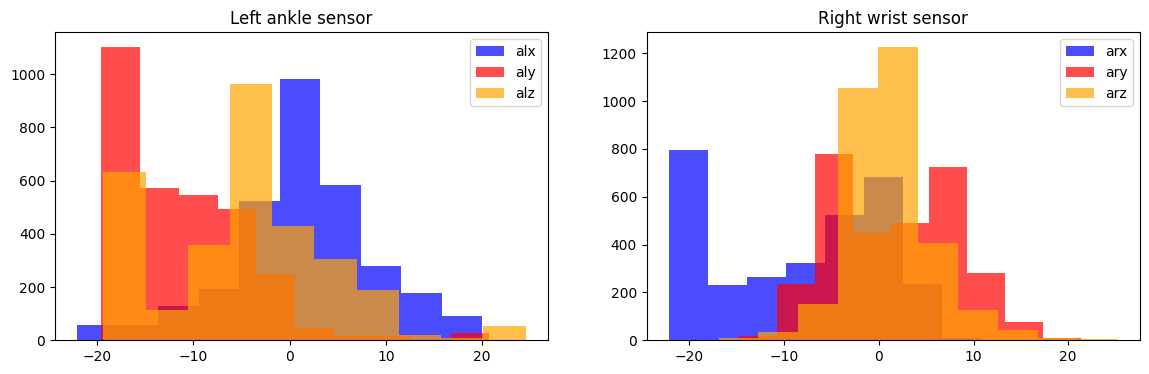

================Lying g================


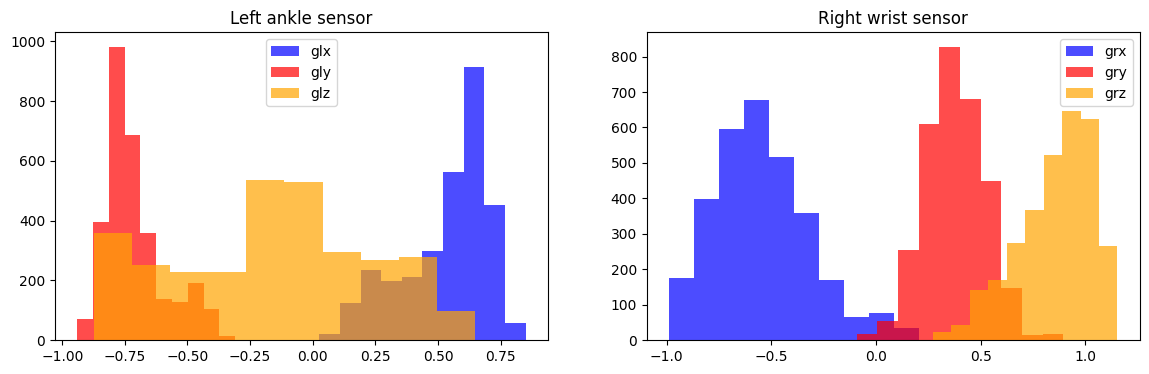

================Bending a================


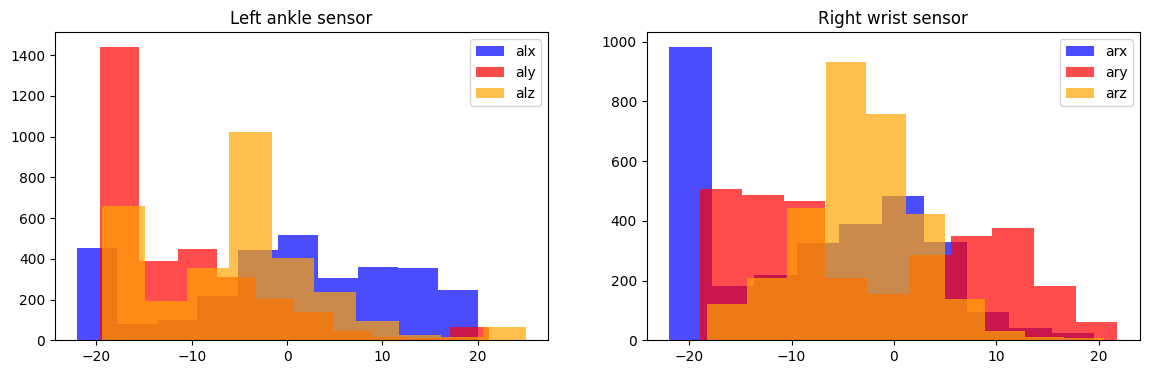

================Bending g================


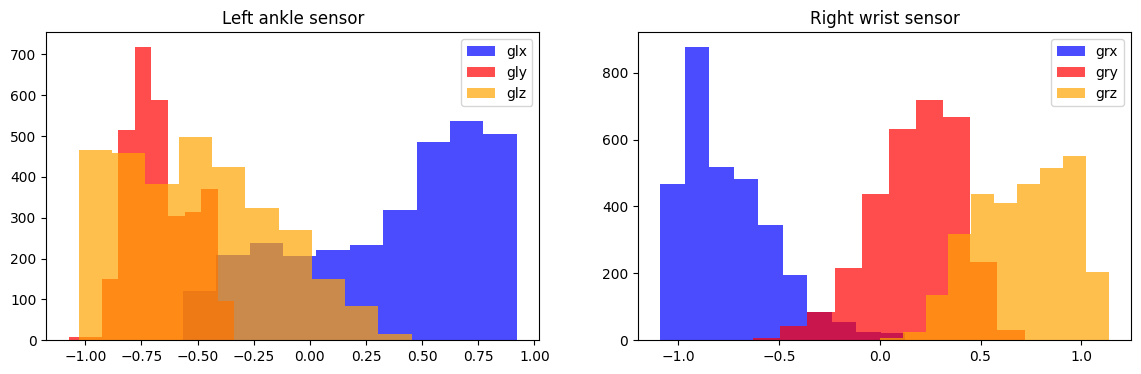

================Others a================


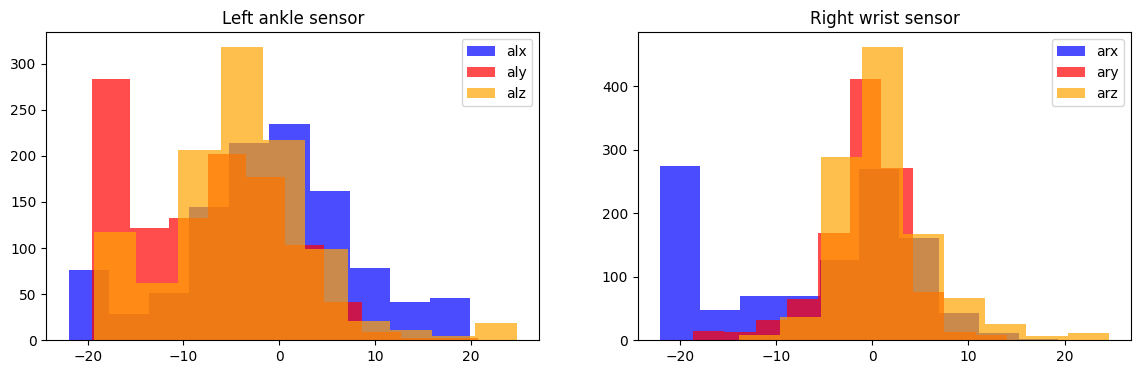

================Others g================


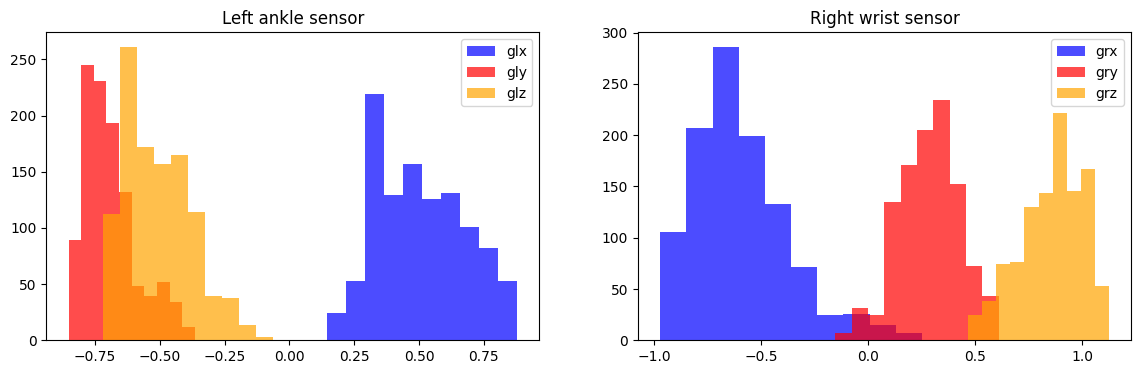

In [24]:
for i in range(1, 13):
    for r in readings:
        print(f"================{activity_label[i]} {r}================")
        plt.figure(figsize=(14, 4))

        plt.subplot(1, 2, 1)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'lx'],
                 color='blue', alpha=0.7, label=r + 'lx')
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'ly'],
                 color='red', alpha=0.7, label=r + 'ly')
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'lz'],
                 color='orange', alpha=0.7, label=r + 'lz')
        plt.title("Left ankle sensor")
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'rx'],
                 color='blue', alpha=0.7, label=r + 'rx')
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'ry'],
                 color='red', alpha=0.7, label=r + 'ry')
        plt.hist(subject1[subject1['Activity'] == i].reset_index(drop=True)[r + 'rz'],
                 color='orange', alpha=0.7, label=r + 'rz')
        plt.title("Right wrist sensor")
        plt.legend()

        plt.show()

In [25]:
df['Activity'] = df['Activity'].replace({
    0: 'None',
    1: 'Standing still (1 min)',
    2: 'Sitting and relaxing (1 min)',
    3: 'Lying down (1 min)',
    4: 'Walking (1 min)',
    5: 'Climbing stairs (1 min)',
    6: 'Waist bends forward (20x)',
    7: 'Frontal elevation of arms (20x)',
    8: 'Knees bending (crouching) (20x)',
    9: 'Cycling (1 min)',
    10: 'Jogging (1 min)',
    11: 'Running (1 min)',
    12: 'Jump front & back (20x)'
})


In [26]:
df['Activity']

1212350                       None
134482                        None
820343                        None
718210                        None
118798                        None
                    ...           
1213641    Jump front & back (20x)
1213642    Jump front & back (20x)
1213643    Jump front & back (20x)
1213644    Jump front & back (20x)
1213645    Jump front & back (20x)
Name: Activity, Length: 383195, dtype: object

In [27]:
df.Activity.value_counts()

Activity
None                               40000
Standing still (1 min)             30720
Sitting and relaxing (1 min)       30720
Lying down (1 min)                 30720
Walking (1 min)                    30720
Cycling (1 min)                    30720
Climbing stairs (1 min)            30720
Running (1 min)                    30720
Jogging (1 min)                    30720
Frontal elevation of arms (20x)    29441
Knees bending (crouching) (20x)    29337
Waist bends forward (20x)          28315
Jump front & back (20x)            10342
Name: count, dtype: int64

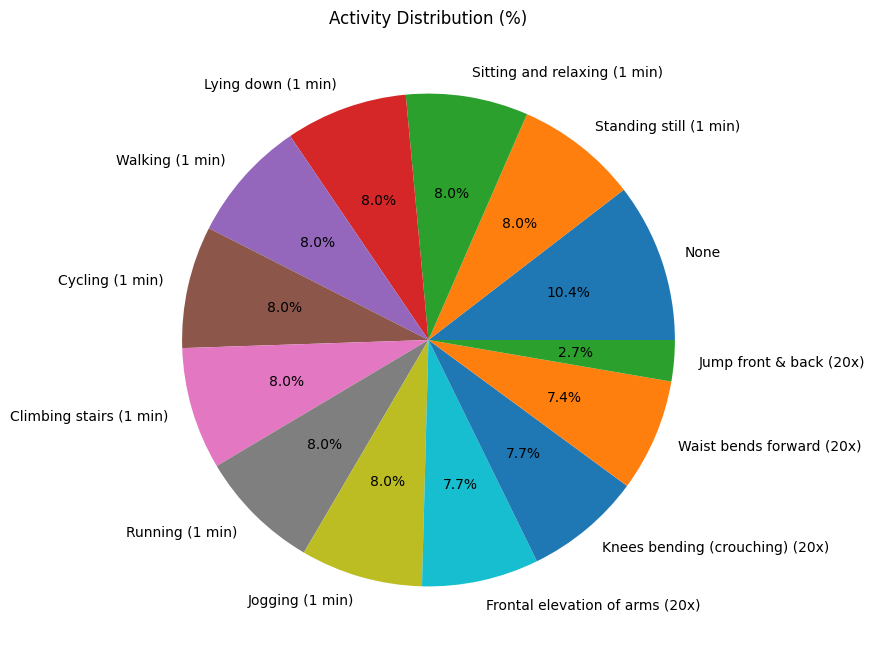

In [28]:
plt.figure(figsize=(12,8))
(df["Activity"].value_counts()/df.shape[0]*100).round(2).plot.pie(autopct='%2.1f%%')
plt.ylabel("")   # y-axis label hata dega
plt.title("Activity Distribution (%)")
plt.show()


In [29]:
df1 = df.copy()

for feature in df1.columns[:-1]:   # last column 'Activity' skip
    if np.issubdtype(df1[feature].dtype, np.number):   # only numeric columns
        lower_range = np.quantile(df1[feature], 0.01)
        upper_range = np.quantile(df1[feature], 0.99)
        print(feature, "range:", lower_range, "to", upper_range)

        df1 = df1.drop(df1[(df1[feature] > upper_range) | (df1[feature] < lower_range)].index, axis=0)
        print("shape:", df1.shape)

alx range: -11.56042 to 19.21306
shape: (375531, 14)
aly range: -19.365 to 1.8220700000000012
shape: (368057, 14)
alz range: -18.606 to 11.823440000000003
shape: (360697, 14)
glx range: -0.75881 to 0.7996300000000001
shape: (353511, 14)
gly range: -1.0394 to 0.96811
shape: (346495, 14)
glz range: -1.0963 to 0.82711
shape: (339658, 14)
arx range: -21.464 to 6.8239
shape: (332870, 14)
ary range: -18.682 to 10.85
shape: (326235, 14)
arz range: -6.409992 to 10.309659999999974
shape: (319709, 14)
grx range: -1.0059 to 0.89412
shape: (313605, 14)
gry range: -1.1253 to 0.92608
shape: (307451, 14)
grz range: -0.66164 to 1.1164
shape: (301450, 14)


In [30]:
df1

alx       aly     alz      glx      gly       glz       arx  \
1212350  1.33590  -9.73940 -1.6611  0.58813 -0.58724 -0.662080  -3.27030   
134482   2.52730 -12.73200 -3.8822  0.51763 -0.58537 -0.758350  -4.34630   
820343   0.55205  -9.74660  1.5807  0.55288 -0.76173 -0.176820  -5.81550   
718210   2.49960  -9.36800  1.8170  0.73655 -0.55159  0.068762  -3.05040   
373043   4.09450 -19.32600 -9.8733 -0.35807 -0.61726 -0.831040   0.90666   
...          ...       ...     ...      ...      ...       ...       ...   
1213636 -0.19979  -0.93484  2.5554  0.63080 -0.52533 -0.679760  -4.02120   
1213637 -0.33315  -1.23710 -2.9194  0.63822 -0.42777 -0.748530  -2.25150   
1213640  6.77570 -15.07500  7.3974  0.61967 -0.33771 -0.827110  -2.27970   
1213641 -2.48730 -19.23300  3.4614  0.61967 -0.33771 -0.827110  -8.23480   
1213645 -2.36980 -19.30000 -4.2387  0.71058 -0.27017 -0.754420 -21.17300   

               ary      arz       grx      gry       grz  \
1212350  -9.053100 -0.30682  0.401960 -1.06160  0.146550   
134482  -10.513000  1.71390 -0.272550 -0.76591  0.851290   
820343   -8.164300 -2.42900  0.137250 -0.99795  0.521550   
718210   -5.913500  4.65220  0.084314 -0.71047  0.900860   
373043   -8.351100 -0.10505 -0.223530 -1.05950 -0.241380   
...            ...      ...       ...      ...       ...   
1213636  -0.082645  0.73545 -0.458820 -1.00000  0.122840   
1213637  -0.414790  0.52093 -0.417650 -1.03700  0.088362   
1213640  -2.358900  2.11120 -0.417650 -1.03700  0.088362   
1213641  -4.965200  2.48090 -0.437250 -1.01850  0.079741   
1213645 -14.291000 -0.13123 -0.425490 -1.03700  0.084052   

                        Activity    subject  
1212350                     None  subject10  
134482                      None   subject1  
820343                      None   subject7  
718210                      None   subject6  
373043                      None   subject3  
...                          ...        ...  
1213636  Jump front & back (20x)  subject10  
1213637  Jump front & back (20x)  subject10  
1213640  Jump front & back (20x)  subject10  
1213641  Jump front & back (20x)  subject10  
1213645  Jump front & back (20x)  subject10  

[301450 rows x 14 columns]

In [31]:
le = LabelEncoder()
df['subject'] = le.fit_transform(df['subject'])

In [32]:
df['Activity']= le.fit_transform(df['Activity'])

alx            Axes(0.125,0.11;0.0466867x0.77)
aly         Axes(0.181024,0.11;0.0466867x0.77)
alz         Axes(0.237048,0.11;0.0466867x0.77)
glx         Axes(0.293072,0.11;0.0466867x0.77)
gly         Axes(0.349096,0.11;0.0466867x0.77)
glz          Axes(0.40512,0.11;0.0466867x0.77)
arx         Axes(0.461145,0.11;0.0466867x0.77)
ary         Axes(0.517169,0.11;0.0466867x0.77)
arz         Axes(0.573193,0.11;0.0466867x0.77)
grx         Axes(0.629217,0.11;0.0466867x0.77)
gry         Axes(0.685241,0.11;0.0466867x0.77)
grz         Axes(0.741265,0.11;0.0466867x0.77)
Activity    Axes(0.797289,0.11;0.0466867x0.77)
subject     Axes(0.853313,0.11;0.0466867x0.77)
dtype: object

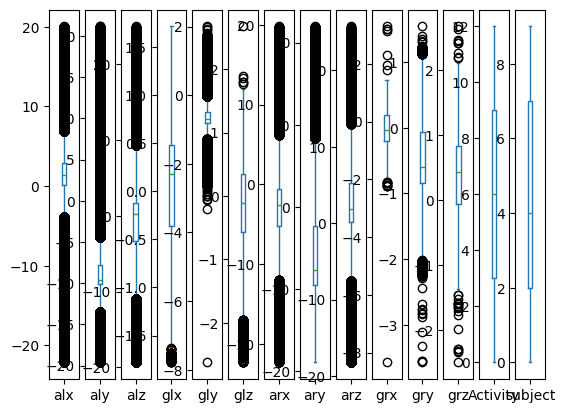

In [33]:
df.plot(kind='box', subplots=True)

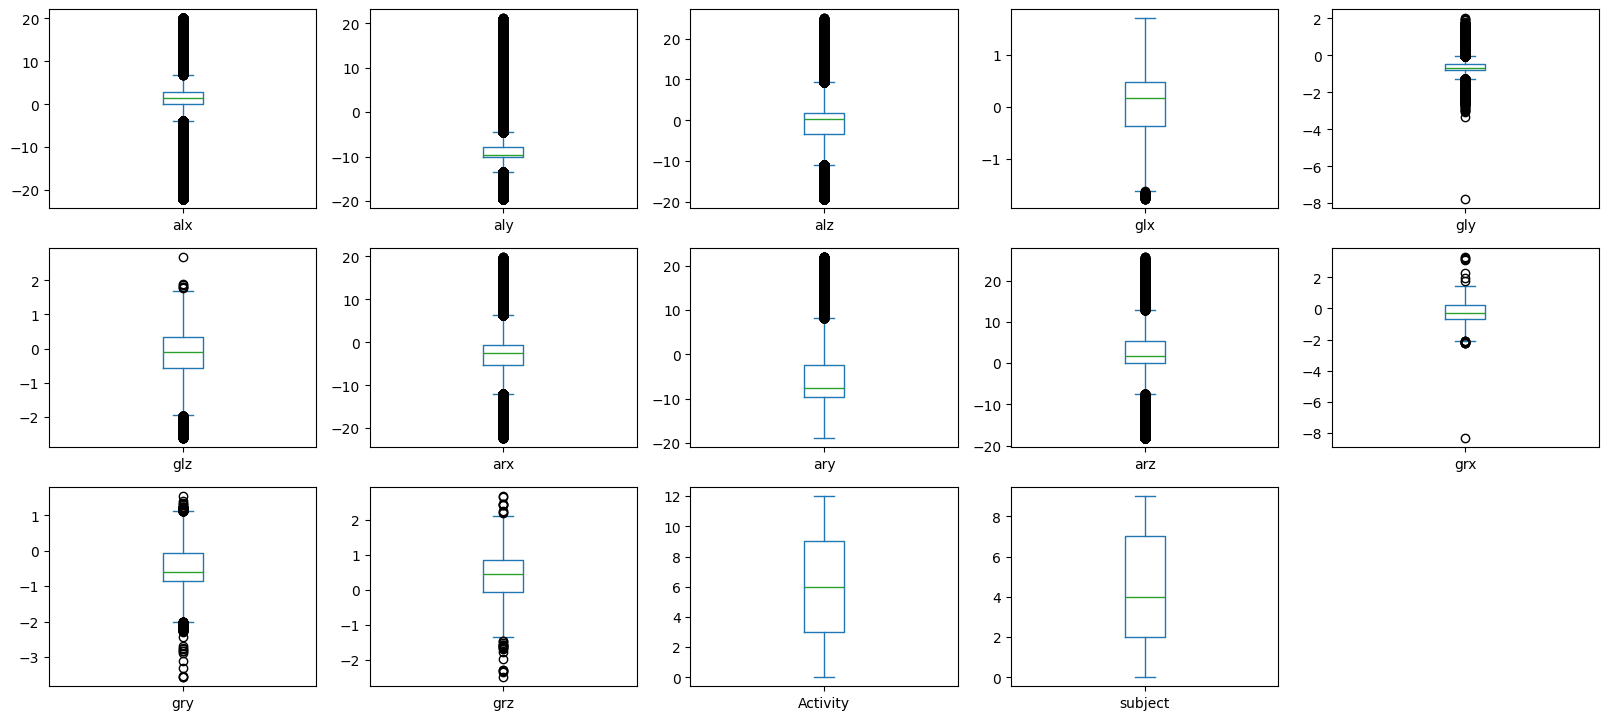

In [34]:
df.plot(kind='box', subplots=True, layout = (5,5) , figsize = (20,15))
plt.show()

In [35]:
x = df.drop(['Activity', 'subject'], axis=1).values
y = df['Activity'].values

In [36]:
# Features and target
feature_cols = ['alx','aly','alz','glx','gly','glz',
                'arx','ary','arz','grx','gry','grz']

X = df[feature_cols]
y = df['Activity']


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Robust Scaler
ro_scaler = RobustScaler().fit(X_train)
X_train_scaled = ro_scaler.transform(X_train)
X_test_scaled = ro_scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape, y_train.shape)
print("Test shape:", X_test_scaled.shape, y_test.shape)


Train shape: (287396, 12) (287396,)
Test shape: (95799, 12) (95799,)


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

def results_summarizer(y_true, y_pred, activity_labels):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix heatmap
    plt.figure(figsize=(15, 15))
    sns.heatmap(cm, annot=True, cmap="Blues", 
                xticklabels=activity_labels.values(),
                yticklabels=activity_labels.values(),
                fmt='g')

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

    # Print classification report
    print("\nClassification Report:\n")
    print(classification_report(y_true, y_pred, target_names=activity_labels.values()))

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Without Scaling
lr = LogisticRegression(max_iter=1000)   # max_iter bada do warna convergence warning aa sakta hai
lr.fit(X_train, y_train)

print("Train Accuracy (without scaling):", lr.score(X_train, y_train))
print("Test Accuracy (without scaling):", lr.score(X_test, y_test))


Train Accuracy (without scaling): 0.5535428468037134
Test Accuracy (without scaling): 0.5545673754423324


C:\Users\soumy\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [43]:

lr2 = LogisticRegression(max_iter=1000)
lr2.fit(X_train_scaled, y_train)

print("\nTrain Accuracy (with scaling):", lr2.score(X_train_scaled, y_train))
print("Test Accuracy (with scaling):", lr2.score(X_test_scaled, y_test))





Train Accuracy (with scaling): 0.5534175840999874
Test Accuracy (with scaling): 0.5544316746521363


In [ ]:
y_pred_lr = lr2predict(X_test_scaled)

In [44]:
resultsSummarizer(y_test, y_pred_lr)

NameError: name 'resultsSummarizer' is not defined

In [46]:
y_pred_lr = lr2.predict(X_test_scaled)


In [51]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def resultsSummarizer(y_true, y_pred):
    print(" Model Evaluation Results\n")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("\nClassification Report:\n", classification_report(y_true, y_pred))

In [55]:
resultsSummarizer(y_test, y_pred_lr)

✅ Model Evaluation Results

Accuracy: 0.5544316746521363

Confusion Matrix:
 [[1963  107  134  149    9 1113   42 1277  176  271  480  496 1463]
 [   6 6975  188    3    0  393    0   78    0    4    1    4   28]
 [   5  398 4345   19    0    8  113  332   42  777  745  362  214]
 [  74    6   73 4955   76   85   26  428 1410  460    0   31   56]
 [   9   32  212  822   68  168   15  242  441  280   40  116  141]
 [ 744   20   11  165    0 3754    0  591   54    1  431 1159  404]
 [   0    0    0    0    0    0 7680    0    0    0    0    0    0]
 [ 343  803  780 1046    2 1019  175 1115  554 1036 1047 1099  981]
 [ 391   32  138  867   37  155   42  244 4681  717   13  144  219]
 [ 566  705  801    0    0    0    0 1544    0 4064    0    0    0]
 [   0    0    0    0    0   59    0  526    0    0 5286 1016  793]
 [   5    1   14    0    0  734    0  622    0    0 1352 4182  169]
 [ 710    3    4   61    0 1001    0  387  230   24  851  363 4046]]

Classification Report:
              

In [56]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Model (k=5 by default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_scaled)

# Results Summary
resultsSummarizer(y_test, y_pred_knn)


✅ Model Evaluation Results

Accuracy: 0.9391642919028382

Confusion Matrix:
 [[7336    1    2   14    5   53    0   78    4    0    1    2  184]
 [   6 7641    1    1    0   12    0   18    0    0    0    1    0]
 [   0    1 7339    0    0    8    0    8    0    0    0    4    0]
 [  10    1    0 7291   38    5    0   32  289    0    0    0   14]
 [  25    1    0  338 1936    8    0   76  160    0    0    1   41]
 [   5    2   18    0    0 7264    0   22    0    2    1   17    3]
 [   0    0    0    0    0    0 7679    1    0    0    0    0    0]
 [ 497  395  316  224  130  440   99 6341  200  157  180  275  746]
 [   5    0    0  387   42    1    0   29 7192    0    0    0   24]
 [   0    0    0    0    0    0    0    2    0 7678    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0 7679    0    0]
 [   1    0   27    0    0   16    0   17    0    0   10 7006    2]
 [  19    0    0    8    1    4    0   55    3    0    0    1 7589]]

Classification Report:
              

In [57]:
# 2. KNN

from sklearn.neighbors import KNeighborsClassifier

# Model
knn1 = KNeighborsClassifier(n_neighbors=5)
knn1.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [58]:
# Training Accuracy
knn1.score(X_train_scaled, y_train)

0.9521009339030466

In [59]:
# Testing Accuracy
knn1.score(X_test_scaled, y_test)

0.9391642919028382

In [60]:
# Predictions
y_pred_knn = knn1.predict(X_test_scaled)

In [67]:
# Results
resultsSummarizer(y_test, y_pred_knn)

✅ Model Evaluation Results

Accuracy: 0.9391642919028382

Confusion Matrix:
 [[7336    1    2   14    5   53    0   78    4    0    1    2  184]
 [   6 7641    1    1    0   12    0   18    0    0    0    1    0]
 [   0    1 7339    0    0    8    0    8    0    0    0    4    0]
 [  10    1    0 7291   38    5    0   32  289    0    0    0   14]
 [  25    1    0  338 1936    8    0   76  160    0    0    1   41]
 [   5    2   18    0    0 7264    0   22    0    2    1   17    3]
 [   0    0    0    0    0    0 7679    1    0    0    0    0    0]
 [ 497  395  316  224  130  440   99 6341  200  157  180  275  746]
 [   5    0    0  387   42    1    0   29 7192    0    0    0   24]
 [   0    0    0    0    0    0    0    2    0 7678    0    0    0]
 [   0    0    0    0    0    0    0    1    0    0 7679    0    0]
 [   1    0   27    0    0   16    0   17    0    0   10 7006    2]
 [  19    0    0    8    1    4    0   55    3    0    0    1 7589]]

Classification Report:
              

In [68]:
def resultsSummarizer(y_true, y_pred, cm=True):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='macro')
    rec = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')

    print(f"Accuracy Score: {acc*100:.4f}%")
    print(f"Precision Score: {prec*100:.4f}%")
    print(f"Recall Score: {rec*100:.4f}%")
    print(f"F1 Score: {f1*100:.4f}%")
    
    # 👇 fix: use bool check instead of "if cm:"
    if cm is True:
        cmatrix = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(10,8))
        sns.heatmap(cmatrix, annot=True, fmt='d', cmap="Blues", 
                    xticklabels=activity_label.values(), 
                    yticklabels=activity_label.values())
        plt.show()


In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [71]:
resultsSummarizer(y_test, y_pred_knn, cm=False)

Accuracy Score: 93.9164%
Precision Score: 93.7860%
Recall Score: 93.7200%
F1 Score: 93.4044%


In [72]:
for n in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    
    print(f"\n============== No of Neighbors: {n} ==============\n")
    resultsSummarizer(y_test, y_pred, cm=False)



============== No of Neighbors: 1 ==============

Accuracy Score: 94.1743%
Precision Score: 93.9535%
Recall Score: 93.9846%
F1 Score: 93.8662%

============== No of Neighbors: 2 ==============

Accuracy Score: 93.4352%
Precision Score: 93.1974%
Recall Score: 93.3402%
F1 Score: 93.0896%

============== No of Neighbors: 3 ==============

Accuracy Score: 94.2609%
Precision Score: 94.0883%
Recall Score: 94.1076%
F1 Score: 93.8047%

============== No of Neighbors: 4 ==============

Accuracy Score: 93.9770%
Precision Score: 93.8419%
Recall Score: 93.7962%
F1 Score: 93.4941%

============== No of Neighbors: 5 ==============

Accuracy Score: 93.9164%
Precision Score: 93.7860%
Recall Score: 93.7200%
F1 Score: 93.4044%

============== No of Neighbors: 6 ==============

Accuracy Score: 93.7056%
Precision Score: 93.5901%
Recall Score: 93.4884%
F1 Score: 93.1462%

============== No of Neighbors: 7 ==============

Accuracy Score: 93.5709%
Precision Score: 93.4764%
Recall Score: 93.3595%
F1 Score: 9

In [83]:
dt = DecisionTreeClassifier(max_depth=14)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [86]:
resultsSummarizer(y_test, y_pred_dt, cm=False)

Accuracy Score: 87.5187%
Precision Score: 87.1942%
Recall Score: 87.4293%
F1 Score: 87.0765%
